<a href="https://colab.research.google.com/github/Sercan1111/Predictive-Maintenance-Classification/blob/main/Predictive_Maintenance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/predictive_maintenance.csv")


df.head(100)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
95,96,M14955,M,299.0,309.0,1351,52.2,44,0,No Failure
96,97,M14956,M,299.0,309.0,1575,35.3,47,0,No Failure
97,98,M14957,M,298.9,308.9,1750,29.9,50,0,No Failure
98,99,L47278,L,298.9,308.8,1529,32.7,53,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df = df.drop(columns=['Product ID', 'UDI'])

# Güncellenmiş datasetin ilk 5 satırını görüntüle
print(df.head(5))

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure  


In [ ]:
# 'Type' sütunundaki benzersiz değerleri görüntüle
unique_types = df['Type'].unique()
print(unique_types)


['M' 'L' 'H']


In [ ]:
# 'Type' sütununu dummy değişkenlere çevir
df = pd.get_dummies(df, columns=['Type'], prefix='is')

# Dummy değişkenleri kontrol et
print(df.head(5))


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type   is_H   is_L   is_M  
0         42.8                0       0   No Failure  False  False   True  
1         46.3                3       0   No Failure  False   True  False  
2         49.4                5       0   No Failure  False   True  False  
3         39.5                7       0   No Failure  False   True  False  
4         40.0                9       0   No Failure  False   True  False  


In [ ]:
# True/False değerlerini 1/0 yap
df['is_H'] = df['is_H'].astype(int)
df['is_L'] = df['is_L'].astype(int)
df['is_M'] = df['is_M'].astype(int)

# Güncellenmiş datasetin ilk 5 satırını kontrol et
print(df.head(5))


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  is_H  is_L  is_M  
0         42.8                0       0   No Failure     0     0     1  
1         46.3                3       0   No Failure     0     1     0  
2         49.4                5       0   No Failure     0     1     0  
3         39.5                7       0   No Failure     0     1     0  
4         40.0                9       0   No Failure     0     1     0  


In [ ]:
# 'Failure Type' sütunundaki benzersiz değerleri ve bunların sayısını görüntüle
unique_failure_types = df['Failure Type'].unique()
number_of_unique_failure_types = len(unique_failure_types)

print("Unique Failure Types:", unique_failure_types)
print("Number of Unique Failure Types:", number_of_unique_failure_types)


Unique Failure Types: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
Number of Unique Failure Types: 6


In [ ]:
# 'Failure Type' sütununu dummy değişkenlere çevir
df = pd.get_dummies(df, columns=['Failure Type'], prefix='is')

# True/False değerlerini 1/0 yap
df = df.astype(int)

# Güncellenmiş datasetin ilk 5 satırını kontrol et
print(df.head(5))


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  298                      308                    1551   
1                  298                      308                    1408   
2                  298                      308                    1498   
3                  298                      308                    1433   
4                  298                      308                    1408   

   Torque [Nm]  Tool wear [min]  Target  is_H  is_L  is_M  \
0           42                0       0     0     0     1   
1           46                3       0     0     1     0   
2           49                5       0     0     1     0   
3           39                7       0     0     1     0   
4           40                9       0     0     1     0   

   is_Heat Dissipation Failure  is_No Failure  is_Overstrain Failure  \
0                            0              1                      0   
1                            0        

In [ ]:
# Sütun türlerini incele
print(df.dtypes)

# Ayrık (discrete) ve sürekli (continuous) değişkenleri belirleme
discrete_variables = df.select_dtypes(include=['int', 'bool']).columns.tolist()
continuous_variables = df.select_dtypes(include=['float']).columns.tolist()

print("Discrete Variables:", discrete_variables)
print("Continuous Variables:", continuous_variables)


Air temperature [K]            int64
Process temperature [K]        int64
Rotational speed [rpm]         int64
Torque [Nm]                    int64
Tool wear [min]                int64
Target                         int64
is_H                           int64
is_L                           int64
is_M                           int64
is_Heat Dissipation Failure    int64
is_No Failure                  int64
is_Overstrain Failure          int64
is_Power Failure               int64
is_Random Failures             int64
is_Tool Wear Failure           int64
dtype: object
Discrete Variables: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'is_H', 'is_L', 'is_M', 'is_Heat Dissipation Failure', 'is_No Failure', 'is_Overstrain Failure', 'is_Power Failure', 'is_Random Failures', 'is_Tool Wear Failure']
Continuous Variables: []


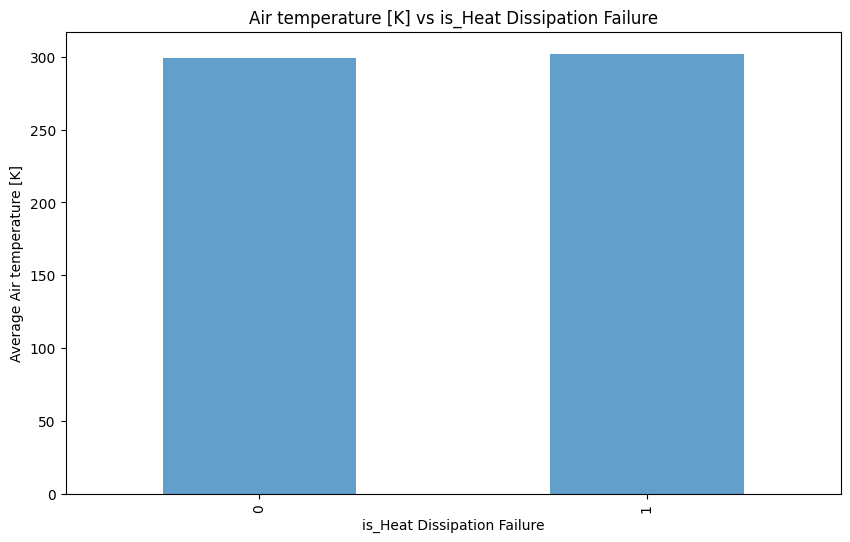

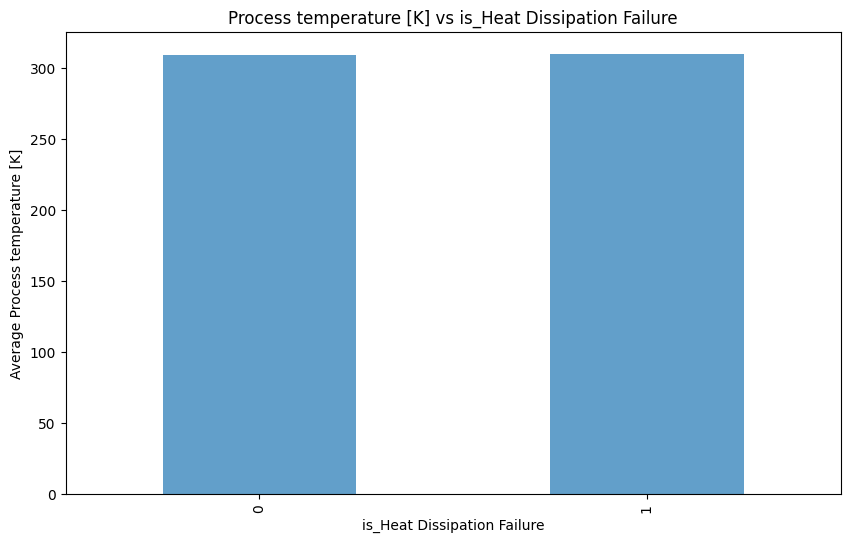

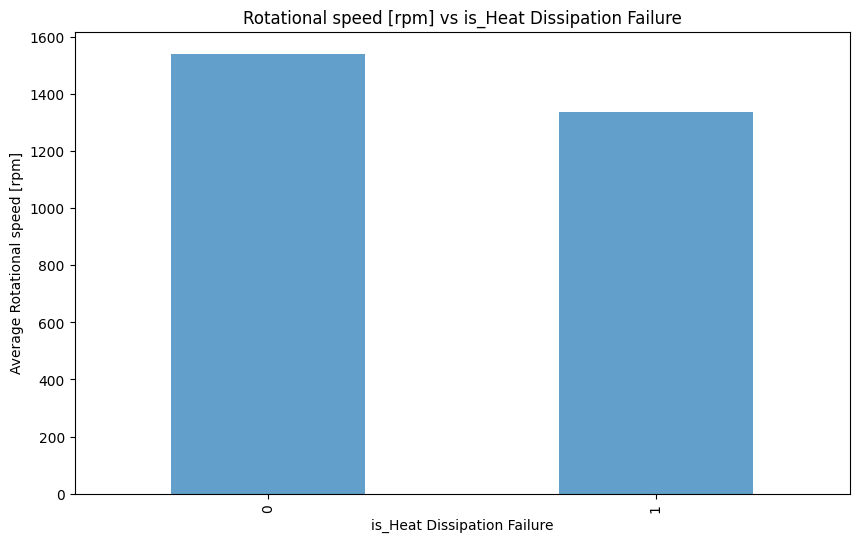

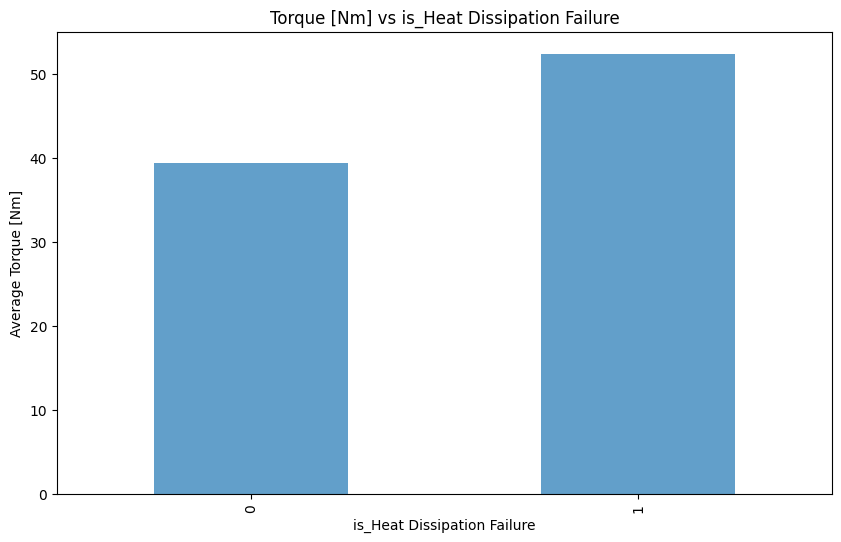

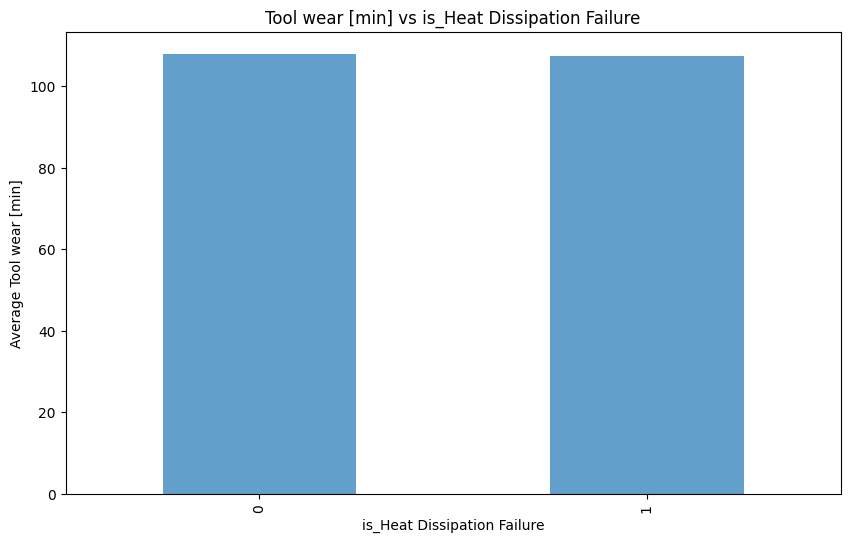

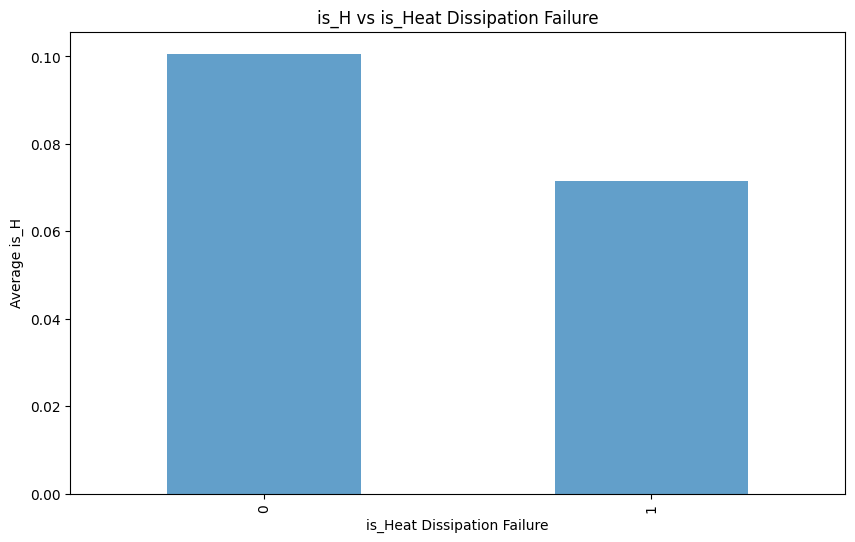

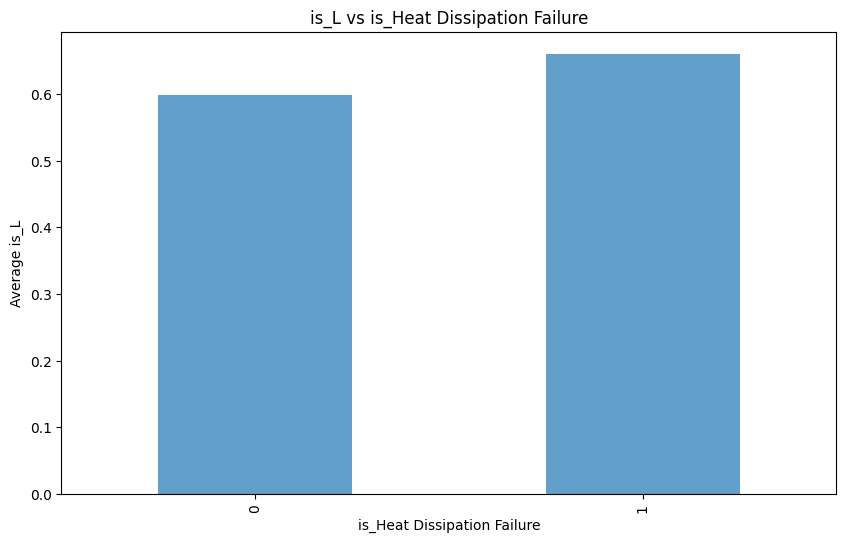

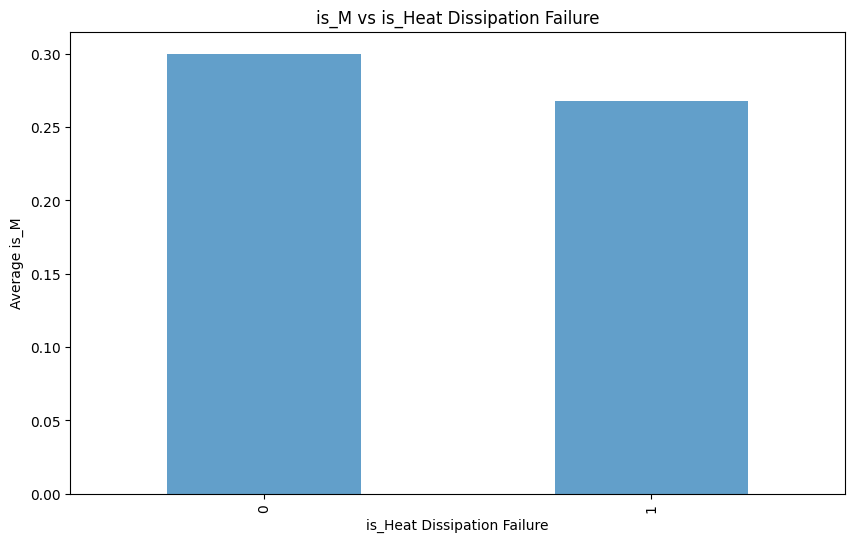

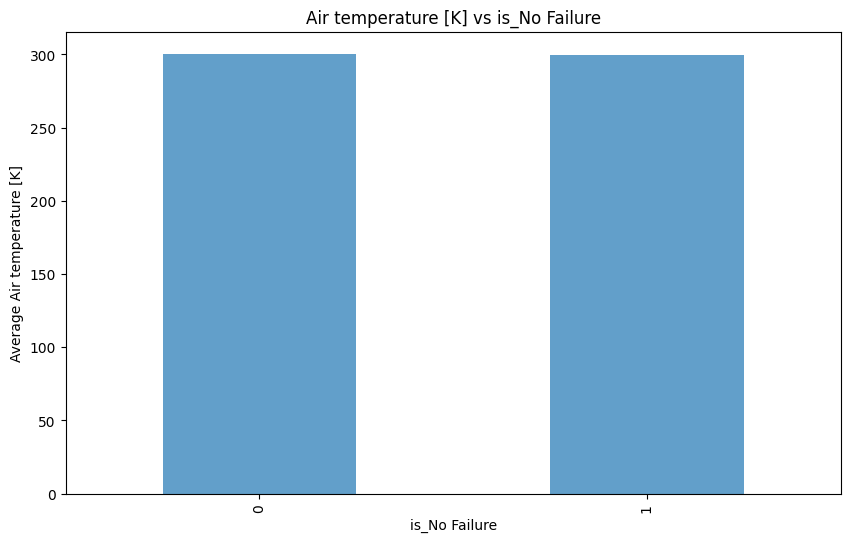

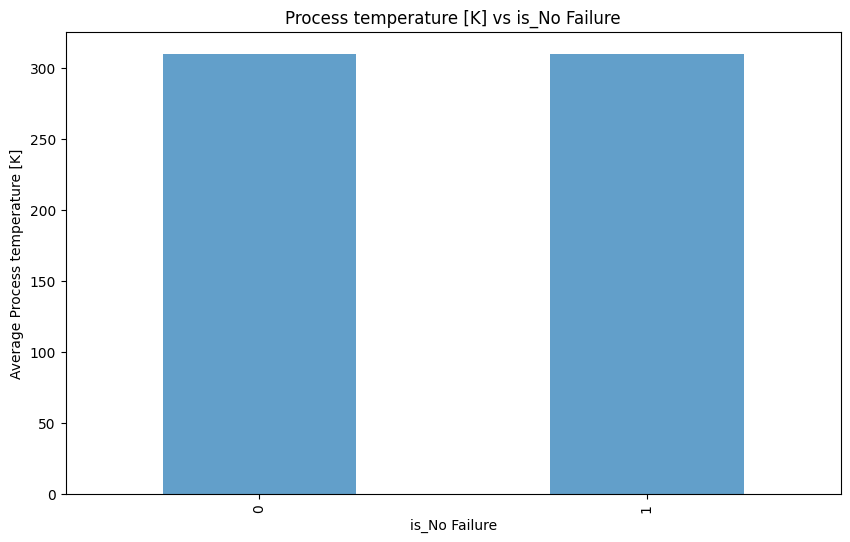

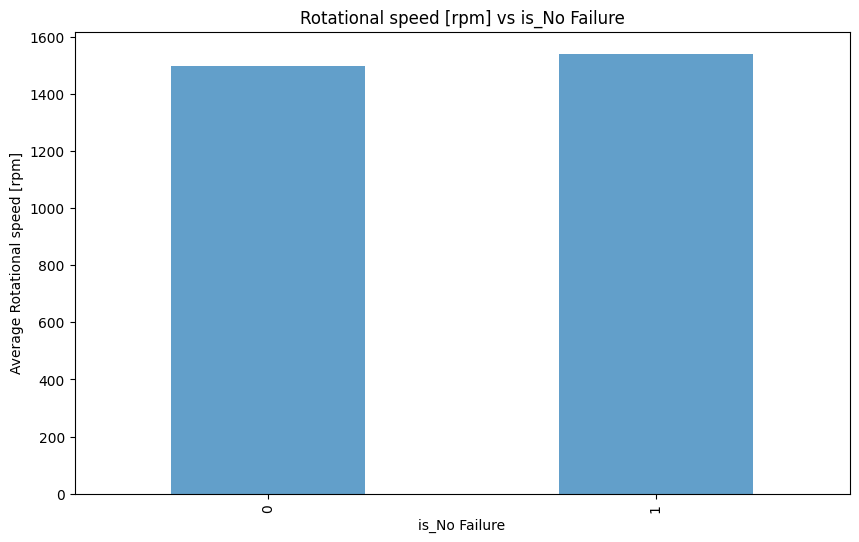

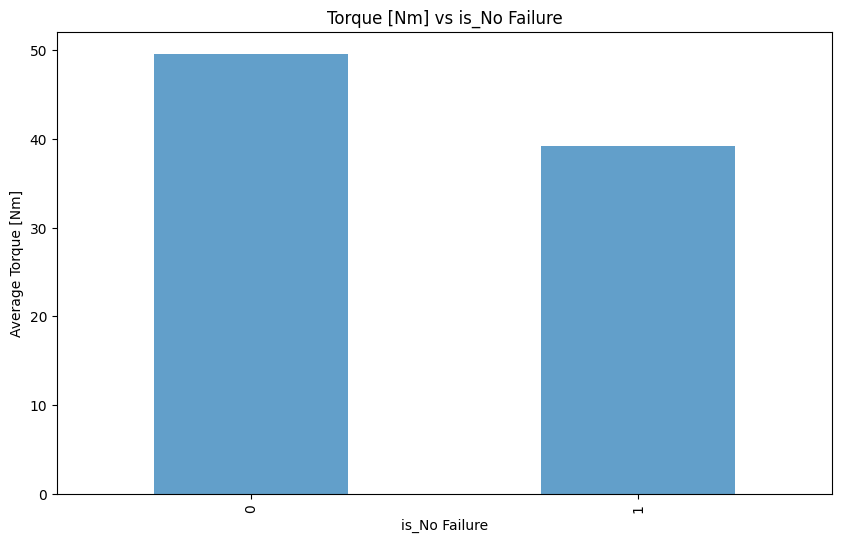

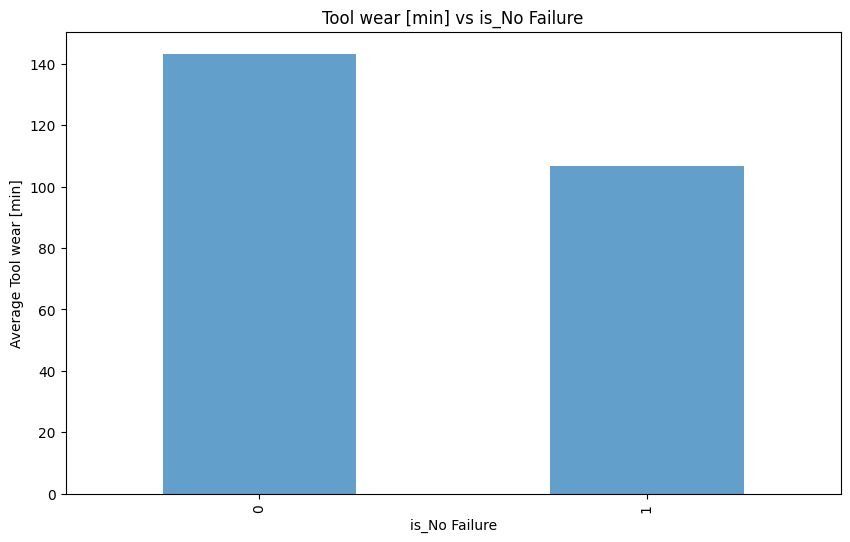

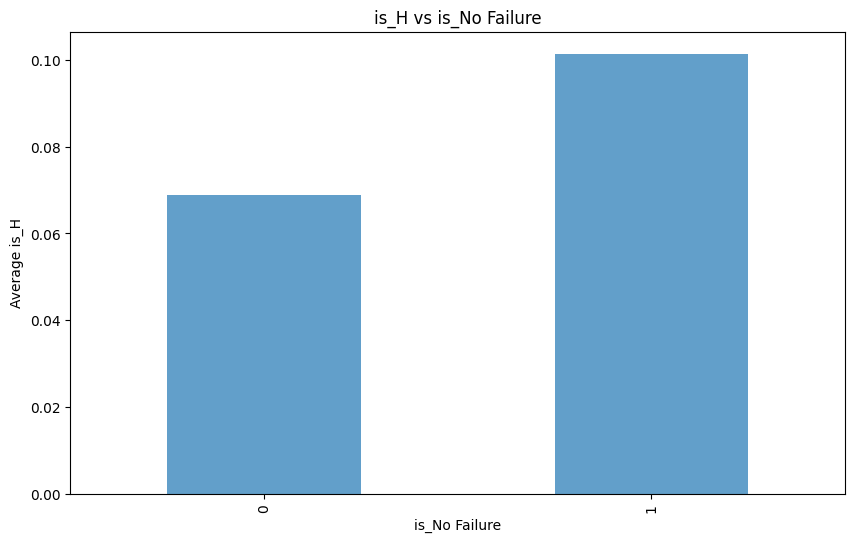

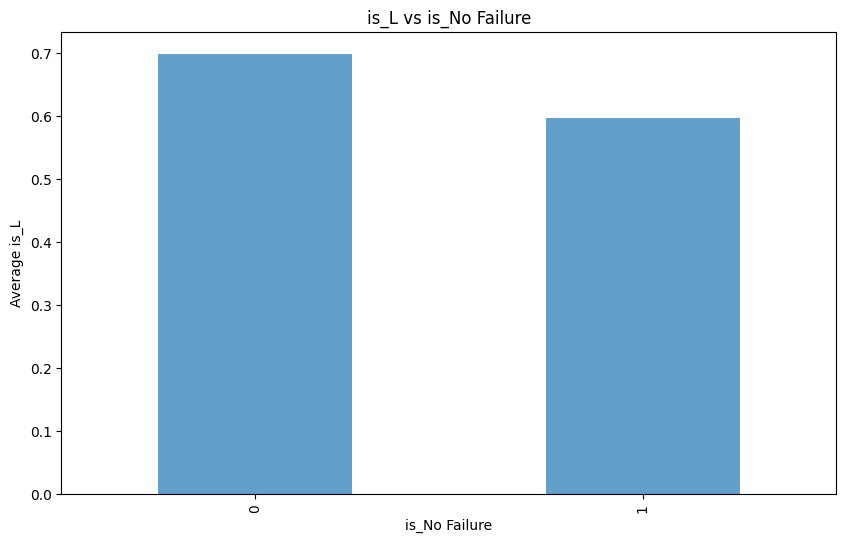

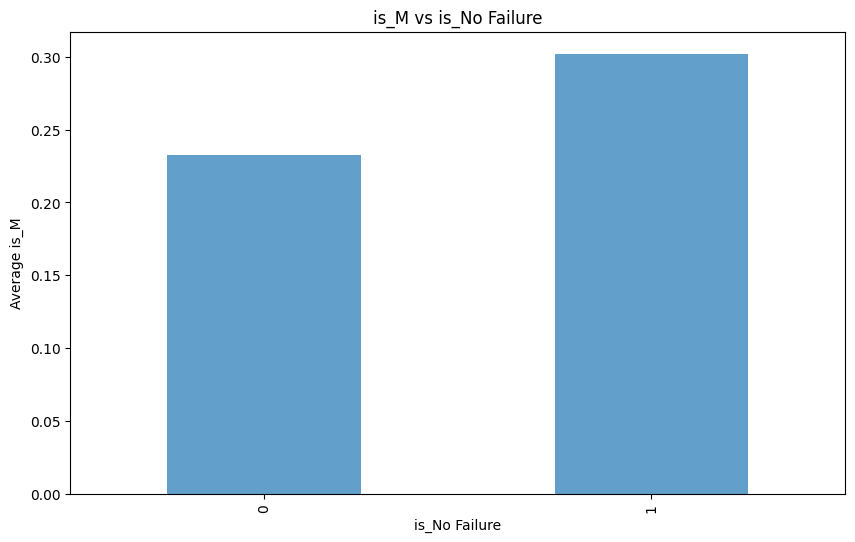

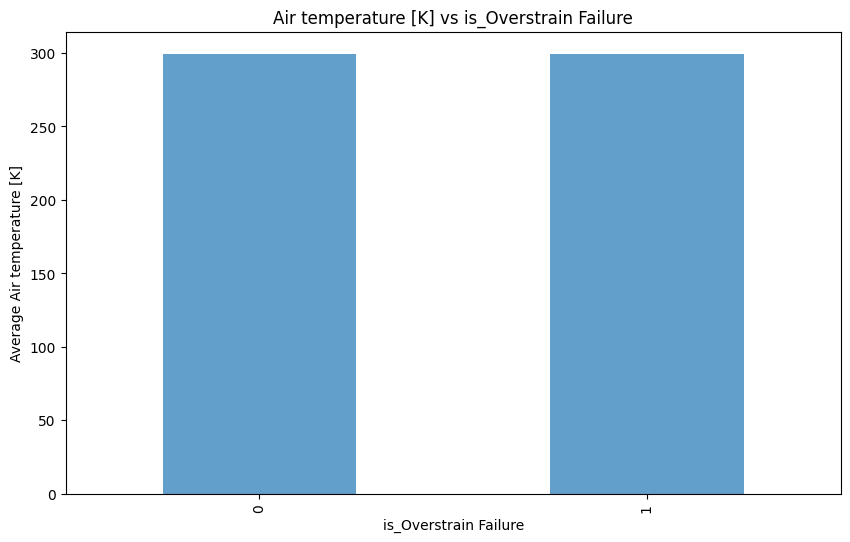

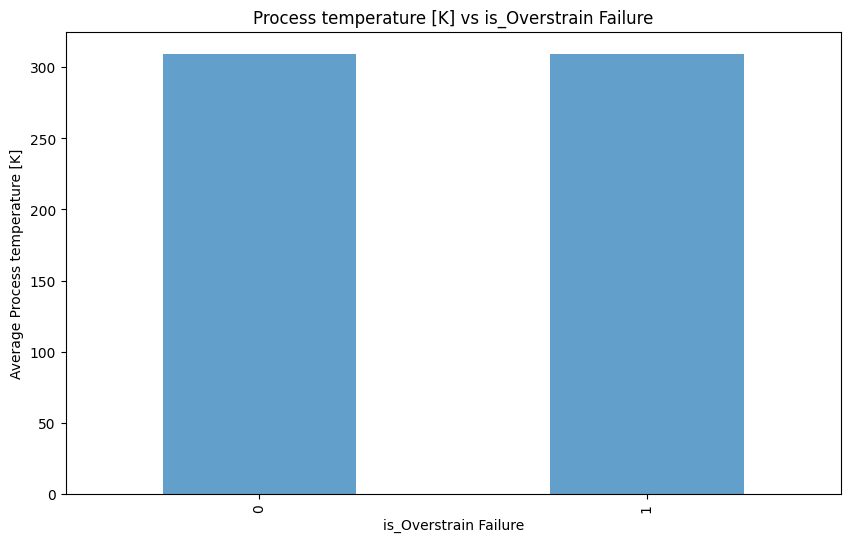

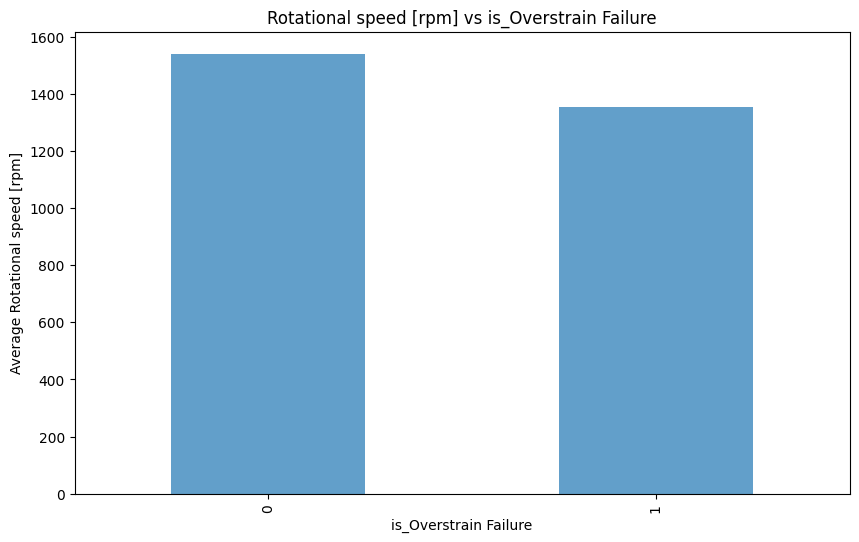

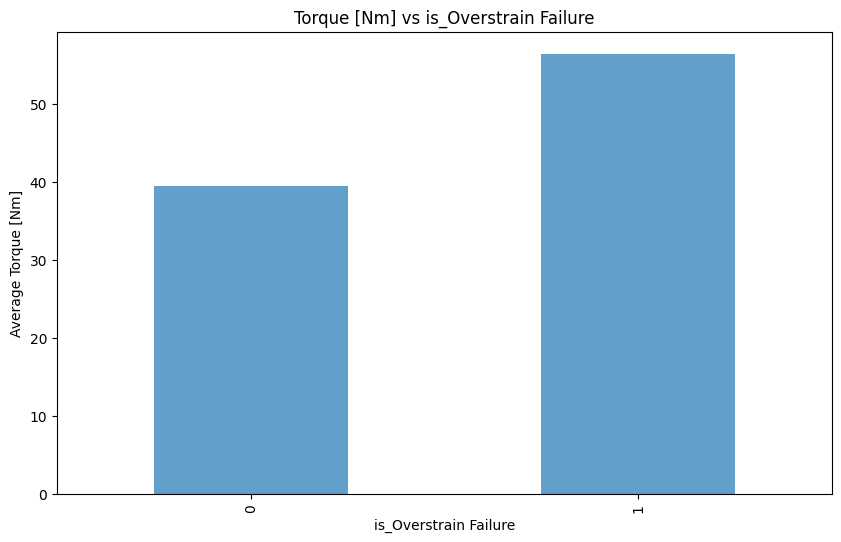

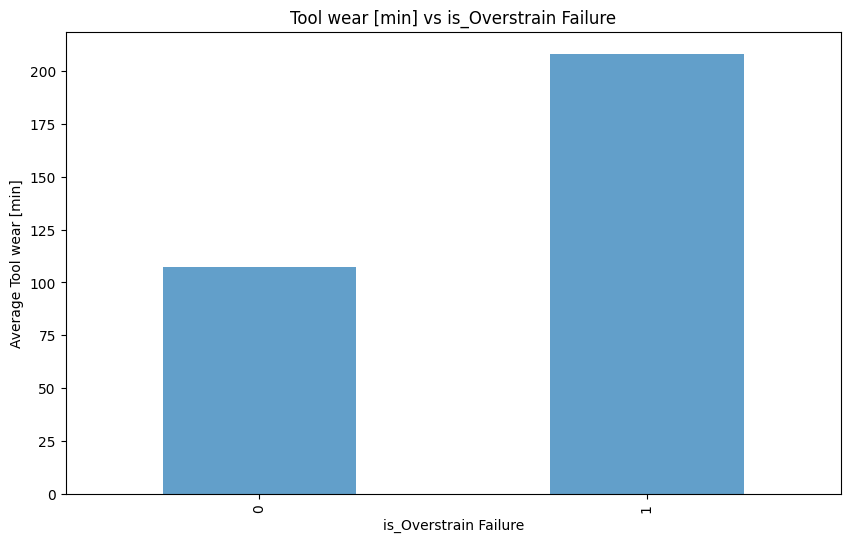

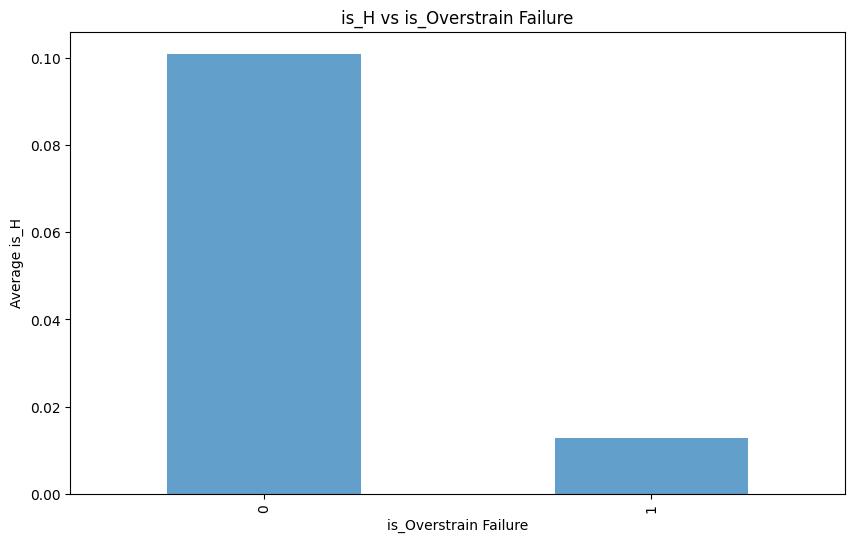

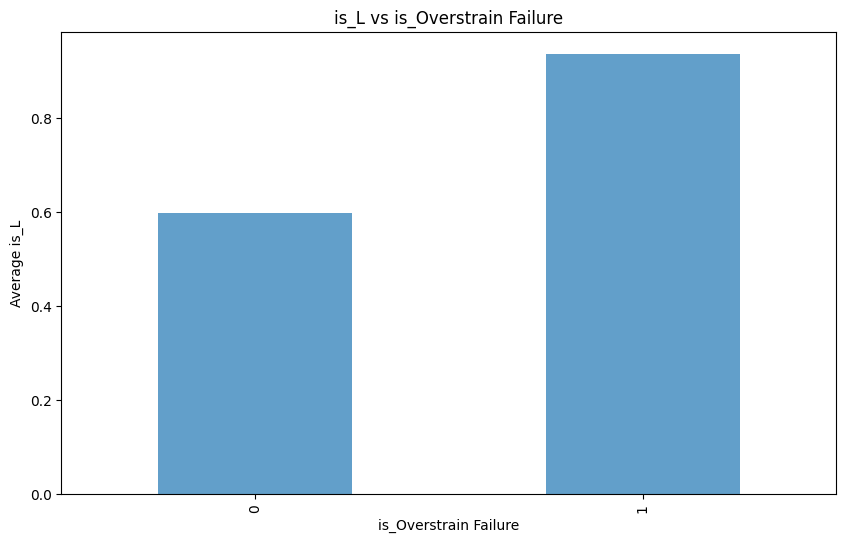

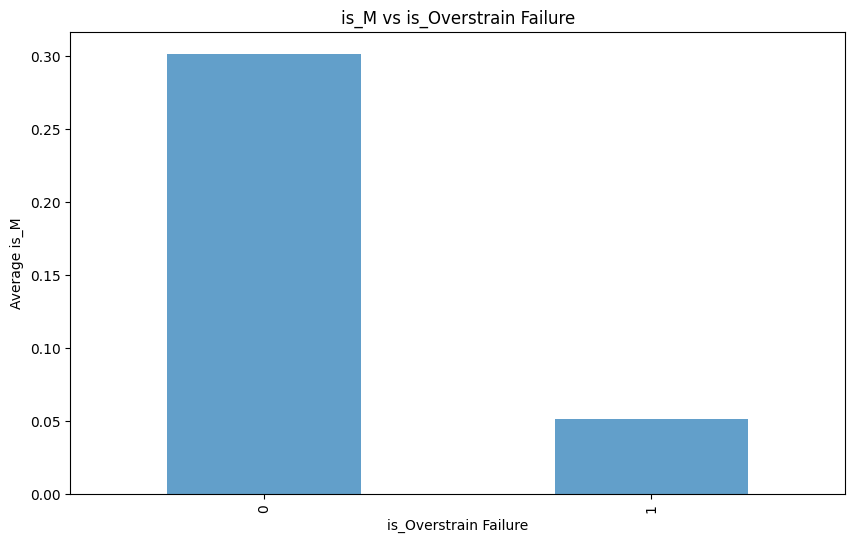

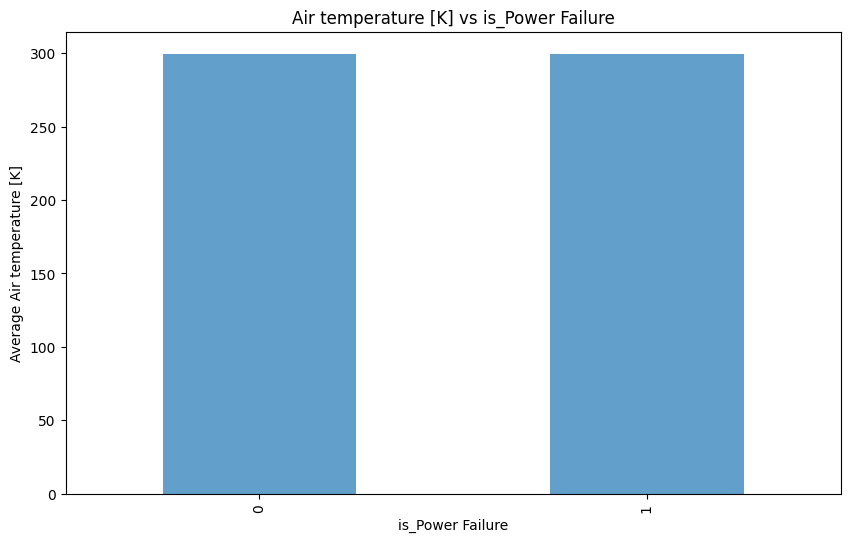

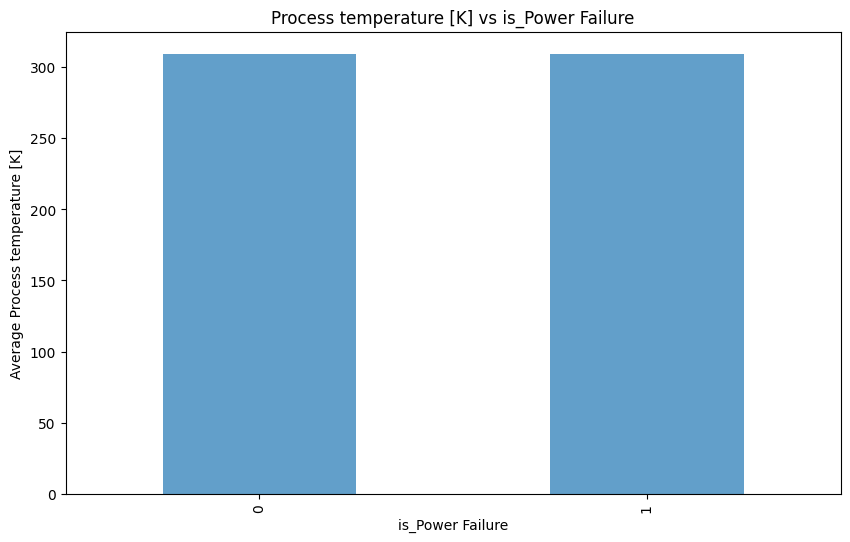

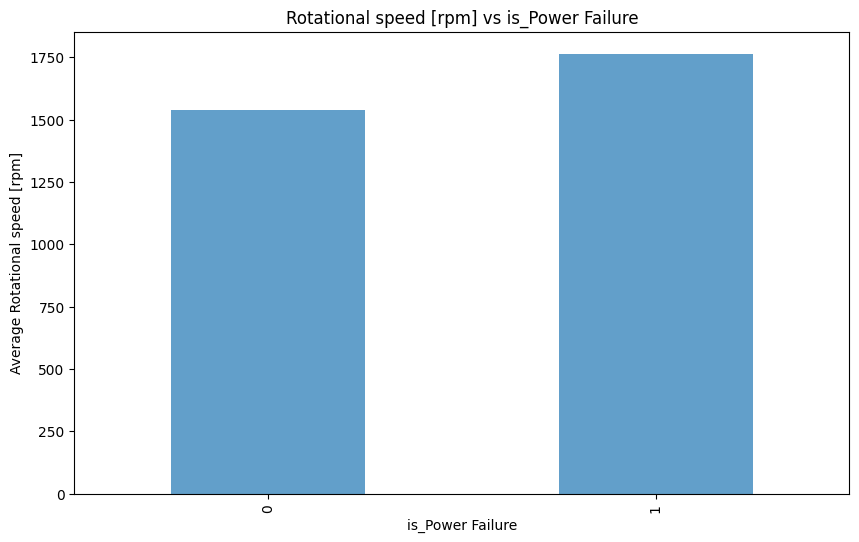

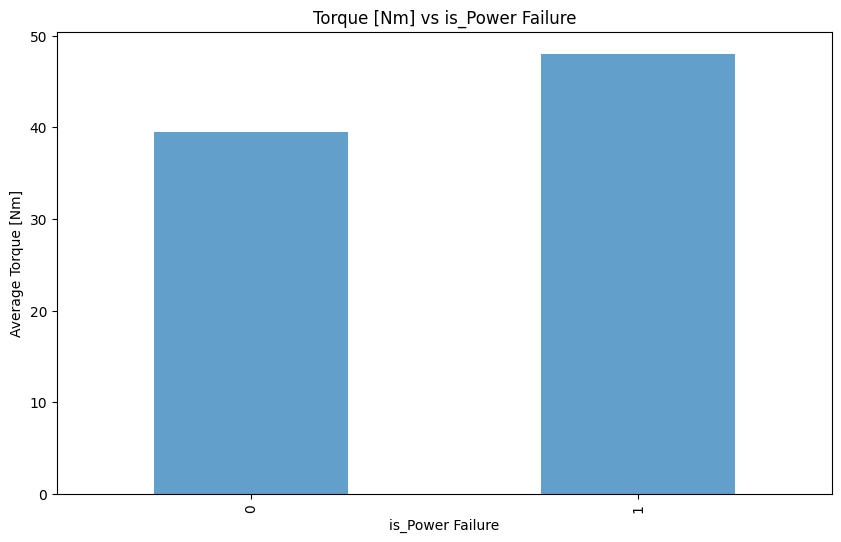

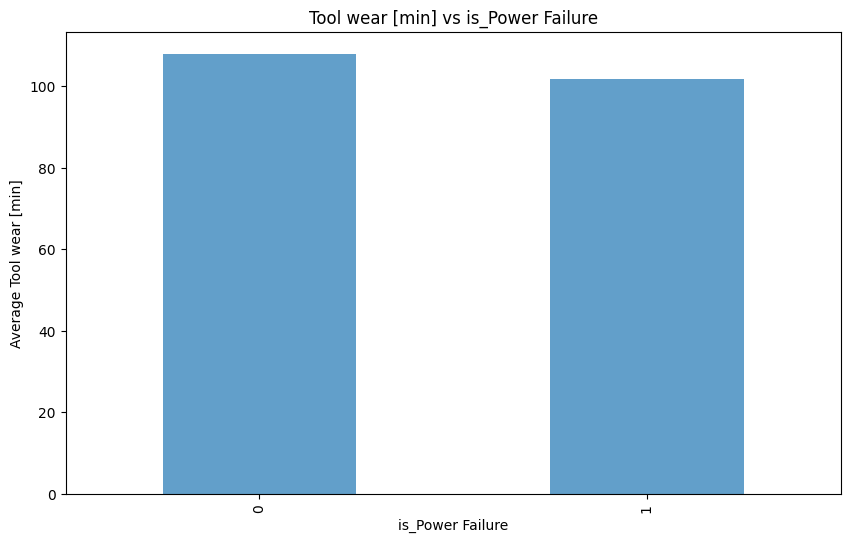

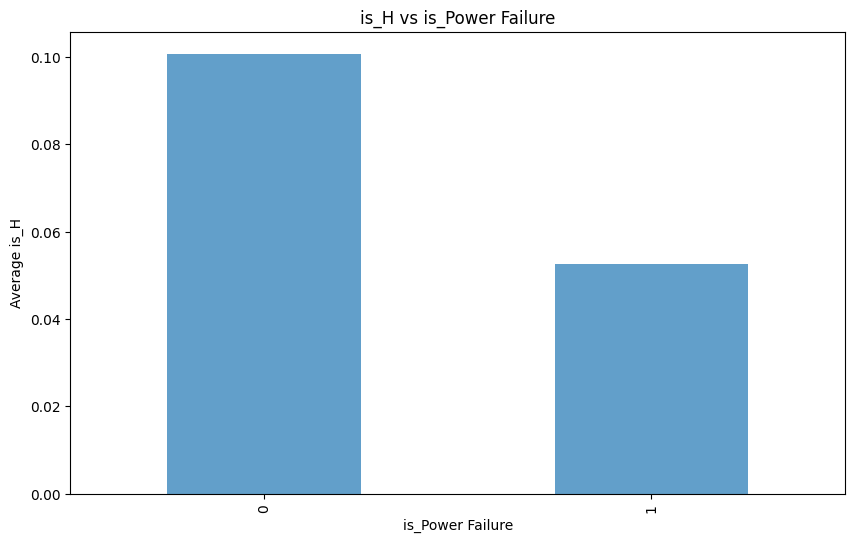

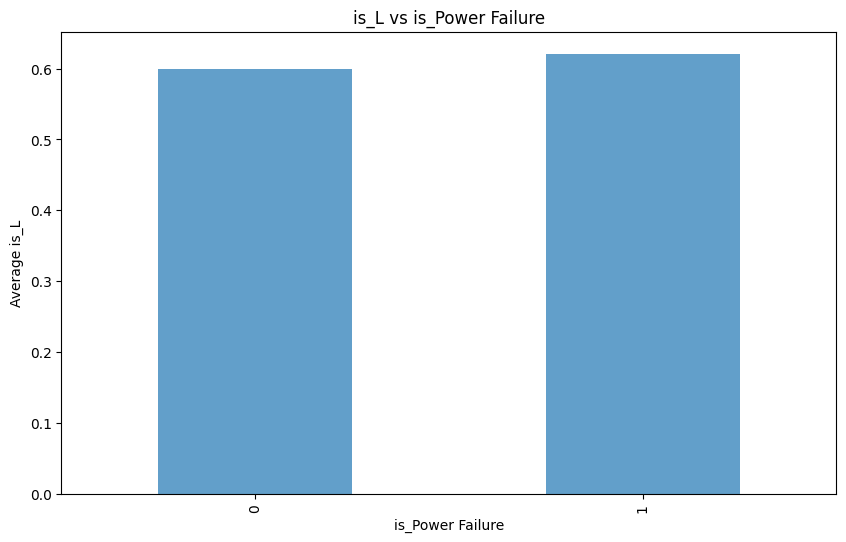

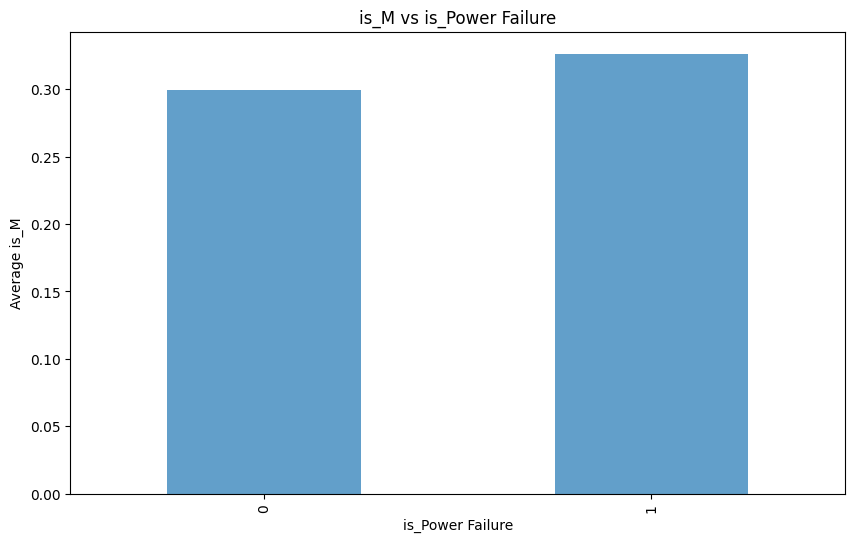

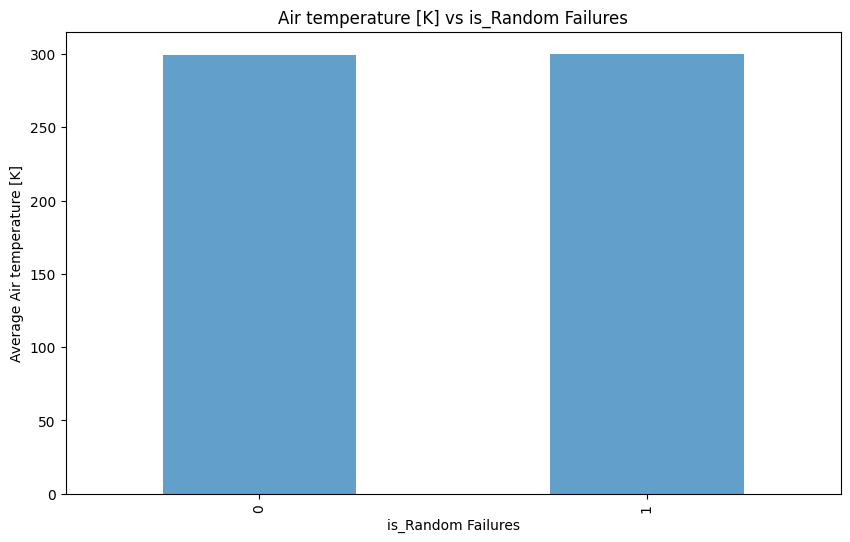

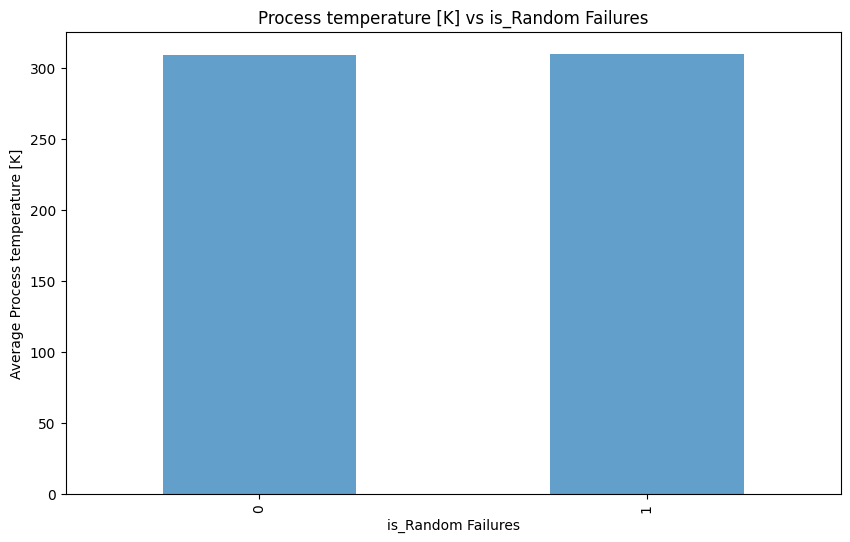

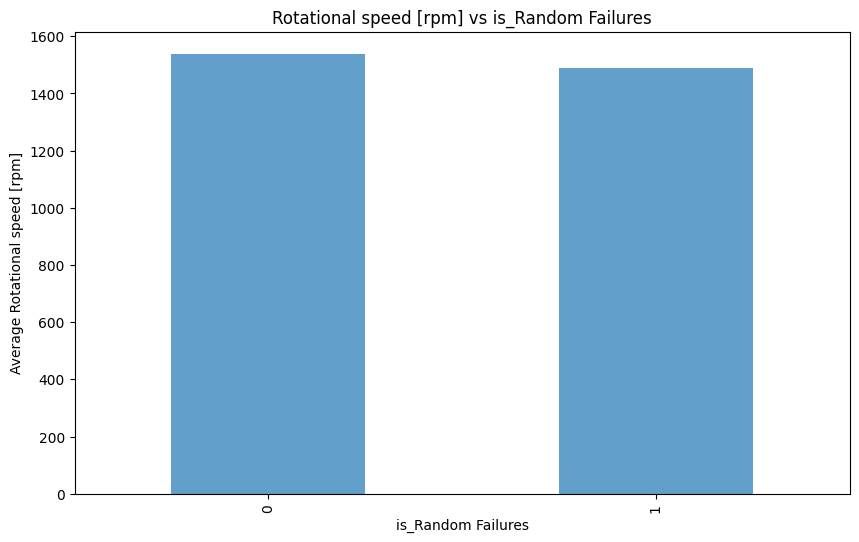

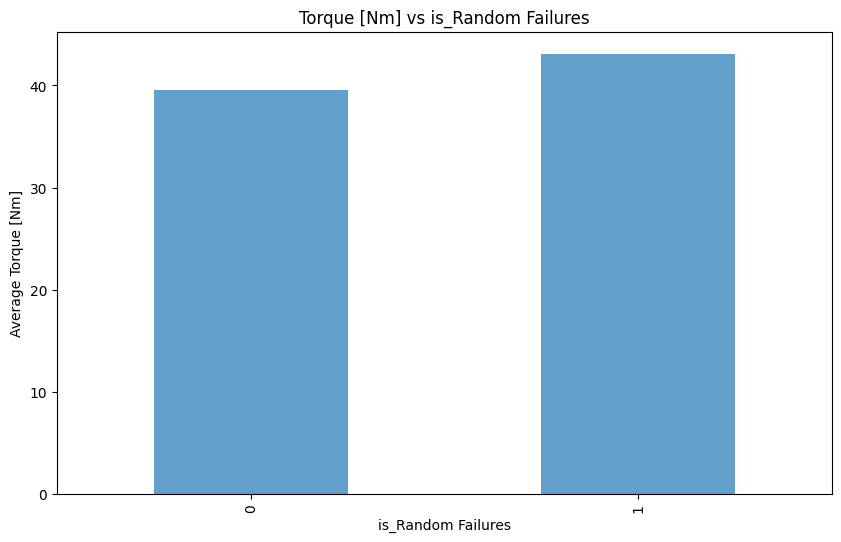

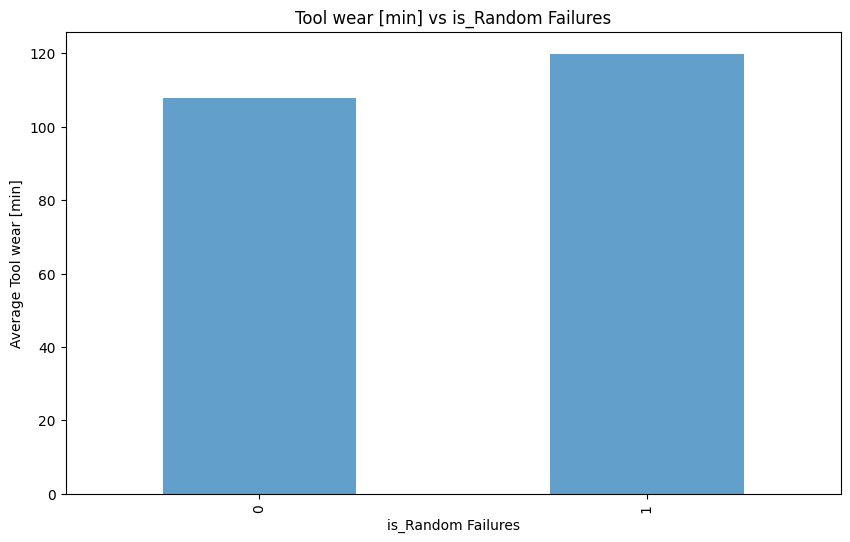

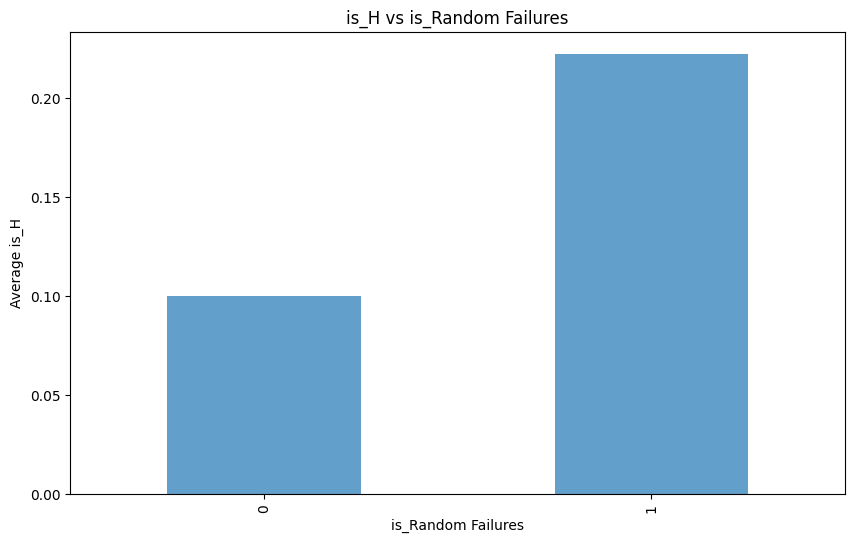

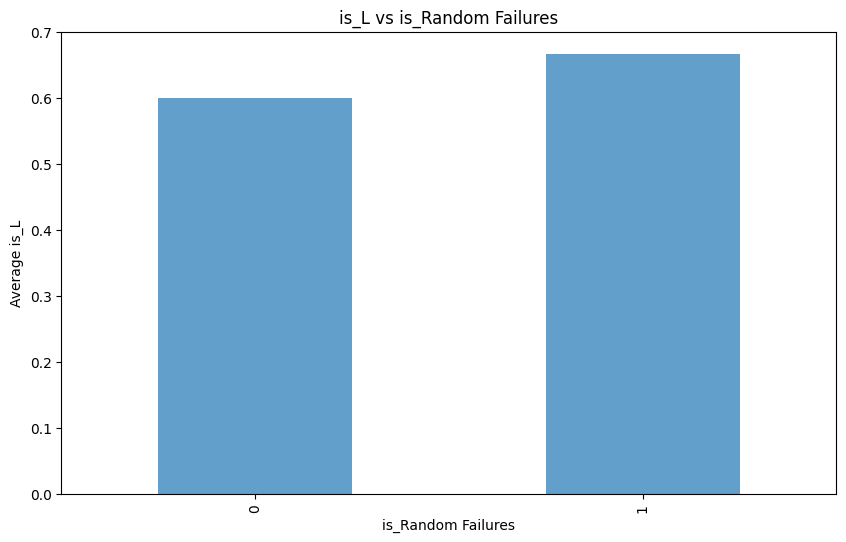

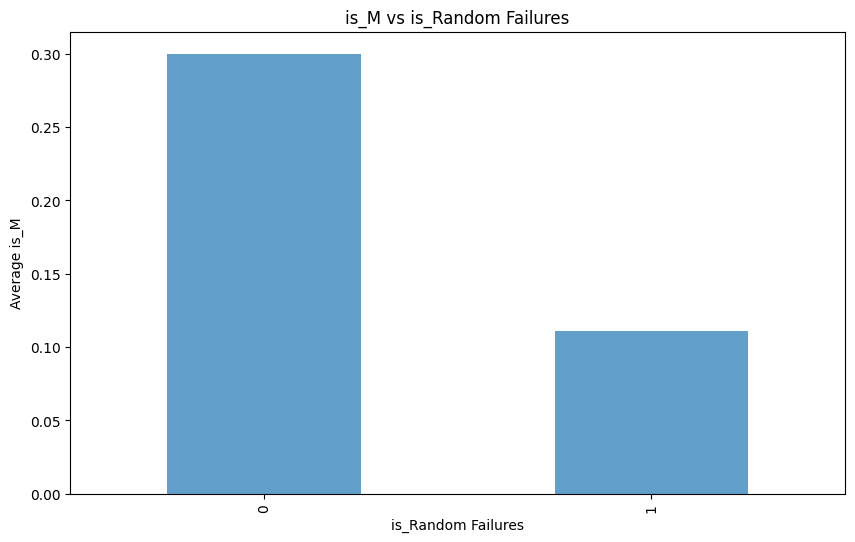

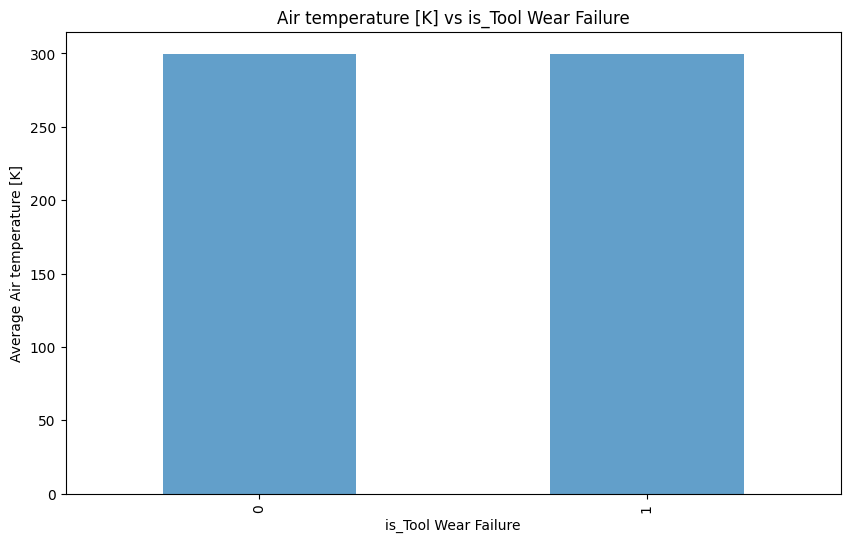

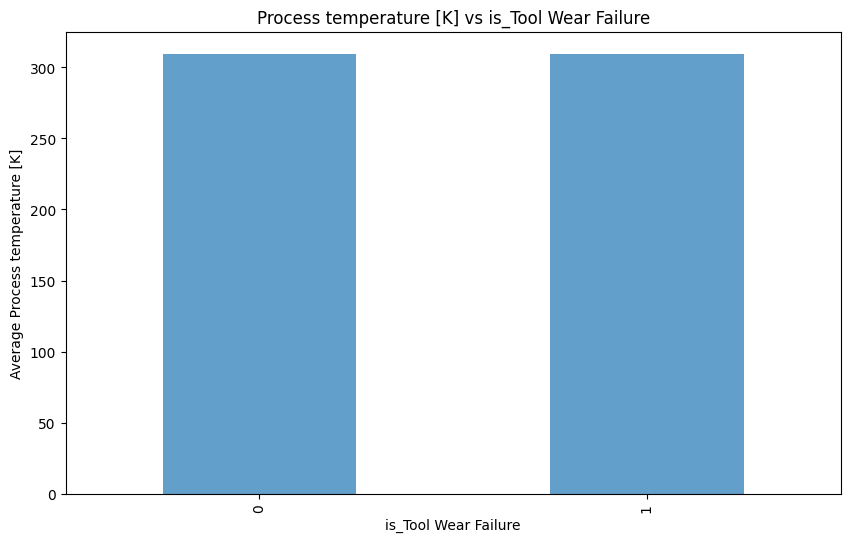

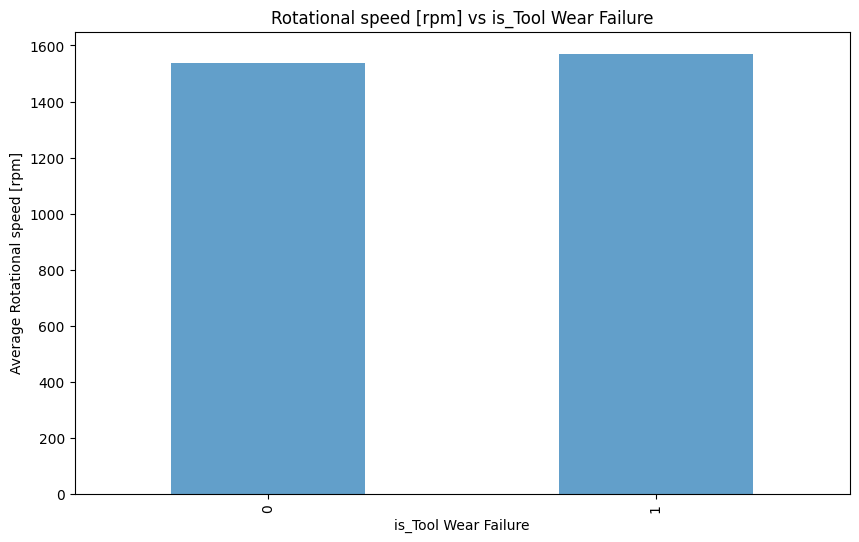

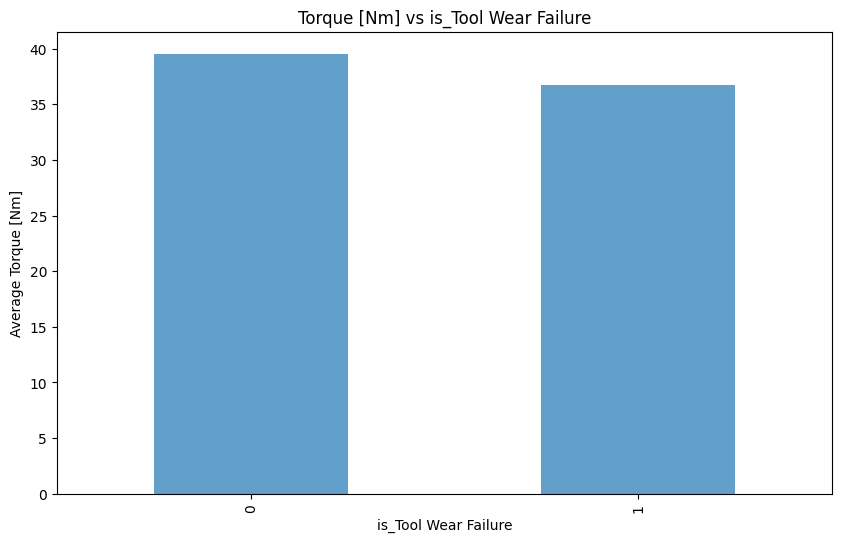

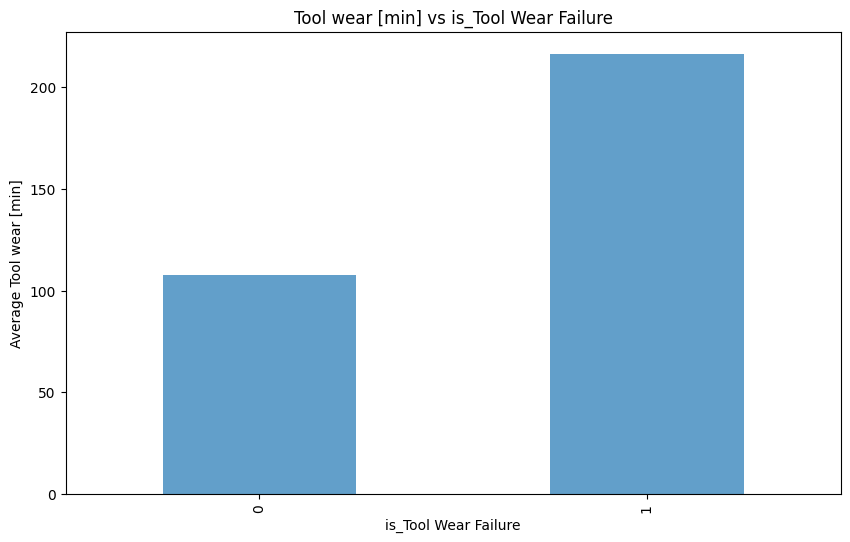

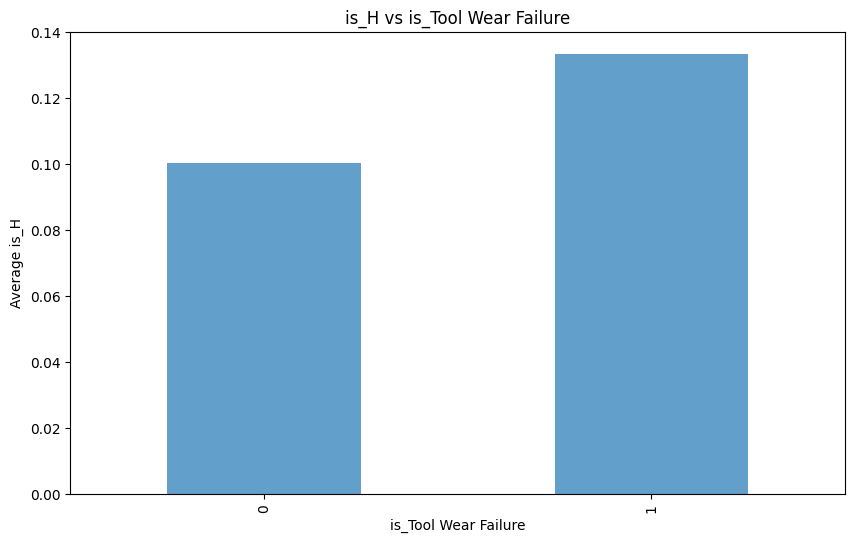

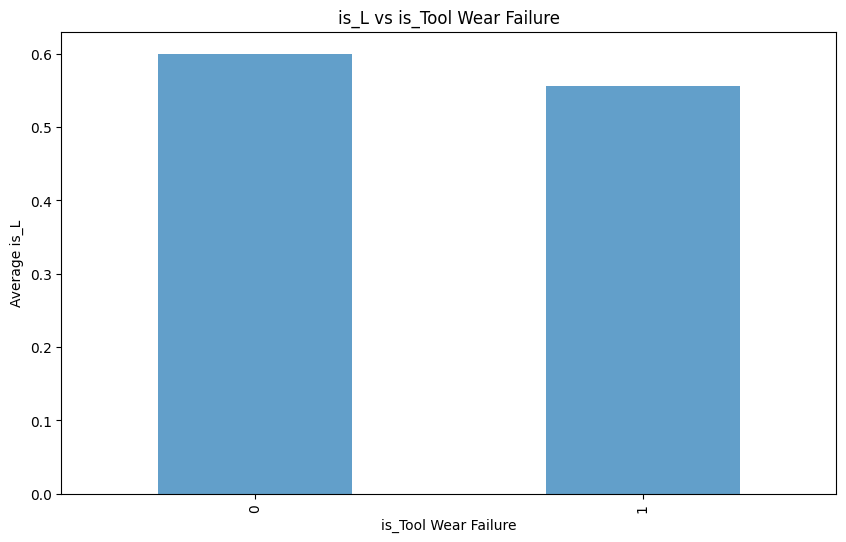

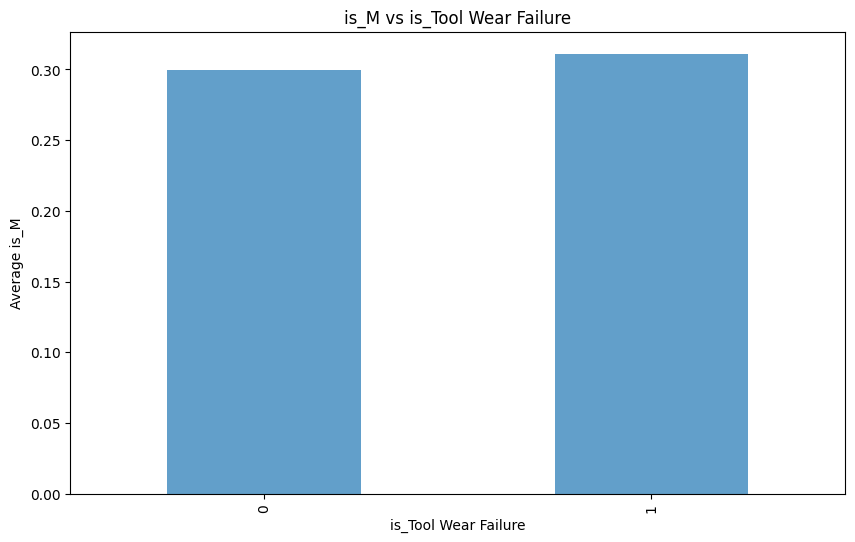

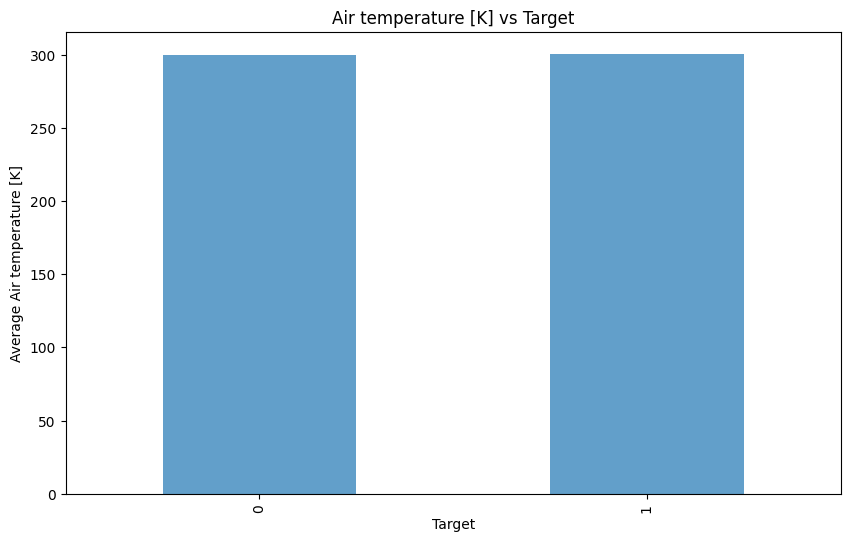

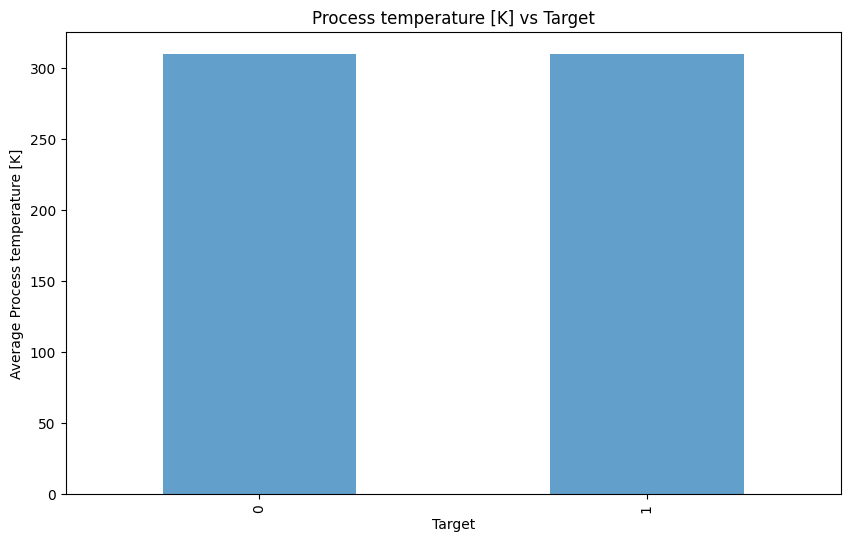

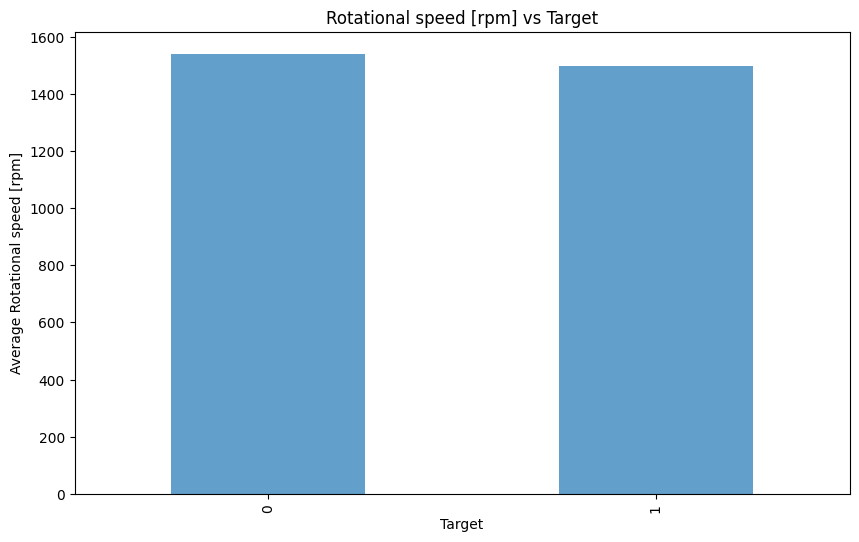

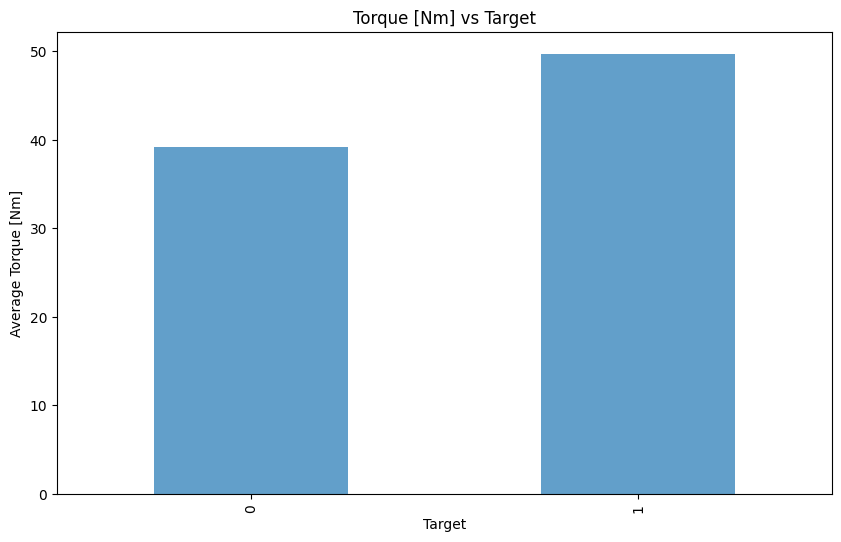

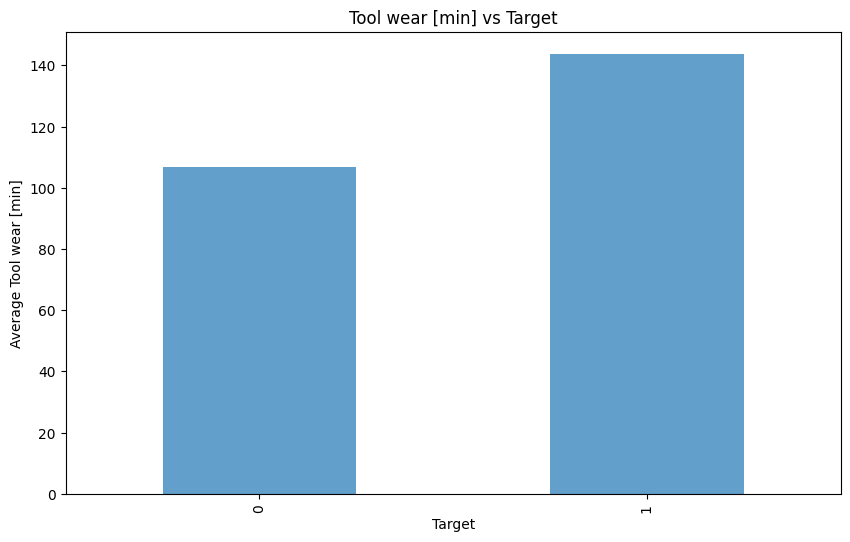

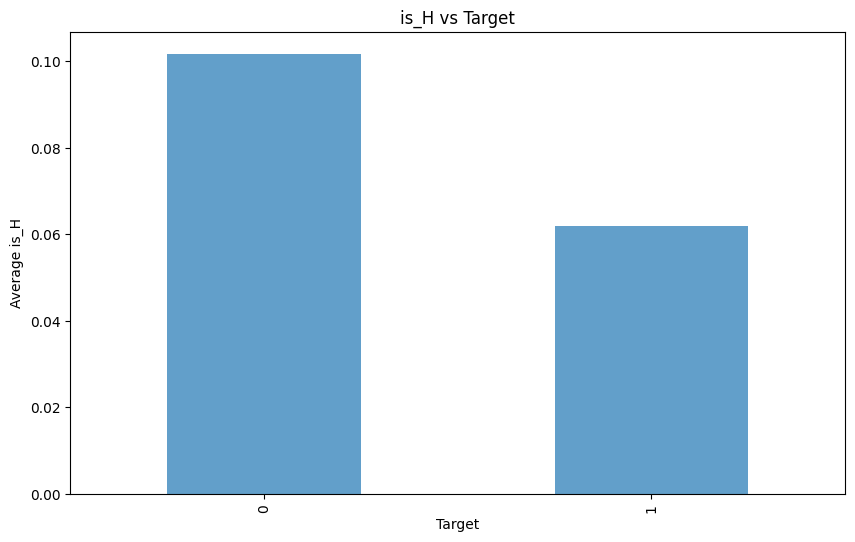

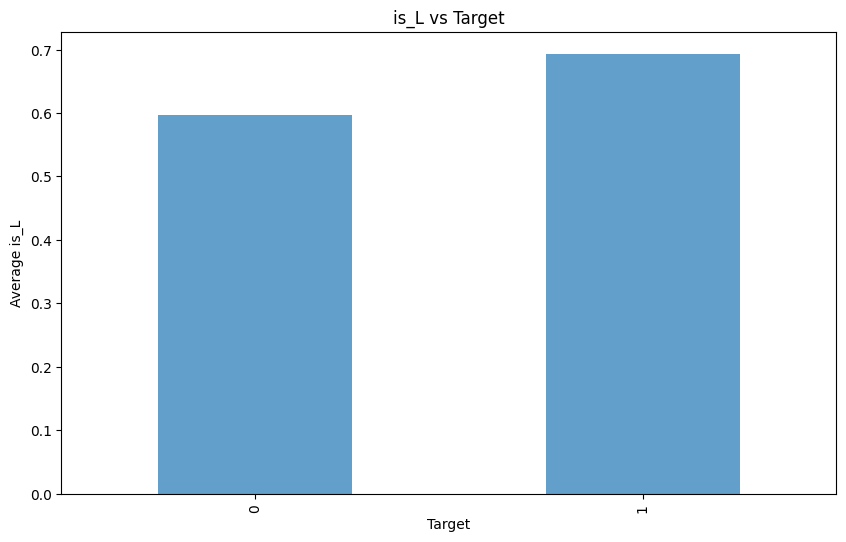

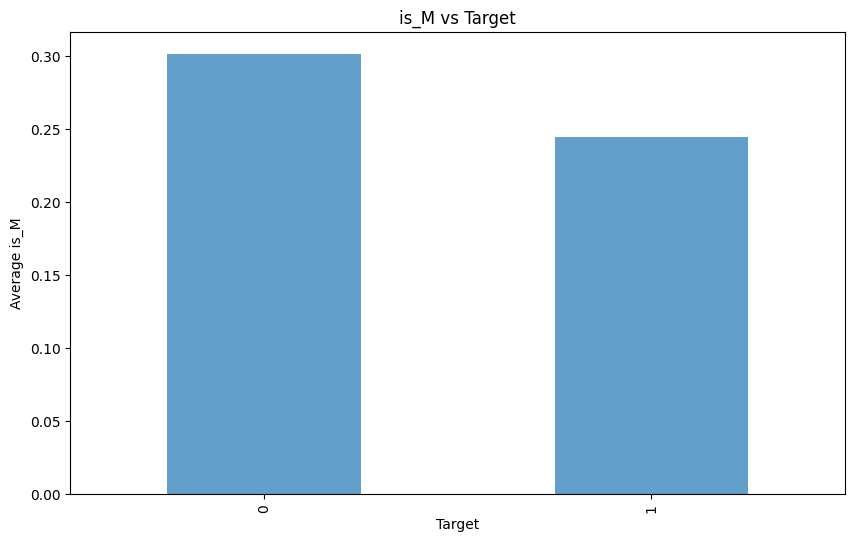

In [ ]:
import matplotlib.pyplot as plt

# Bağımsız değişkenlerin listesi
independent_features = [
    'is_Heat Dissipation Failure',
    'is_No Failure',
    'is_Overstrain Failure',
    'is_Power Failure',
    'is_Random Failures',
    'is_Tool Wear Failure',
    'Target'
]

# Bağımlı değişkenlerin listesini oluştur
dependent_features = [col for col in df.columns if col not in independent_features]

# Her bir bağımsız değişken için, her bir bağımlı değişkeni bar plot ile göster
for ind_feature in independent_features:
    for dep_feature in dependent_features:
        plt.figure(figsize=(10, 6))
        mean_value = df.groupby(ind_feature)[dep_feature].mean()
        mean_value.plot(kind='bar', alpha=0.7)
        plt.title(f'{dep_feature} vs {ind_feature}')
        plt.xlabel(ind_feature)
        plt.ylabel(f'Average {dep_feature}')
        plt.show()


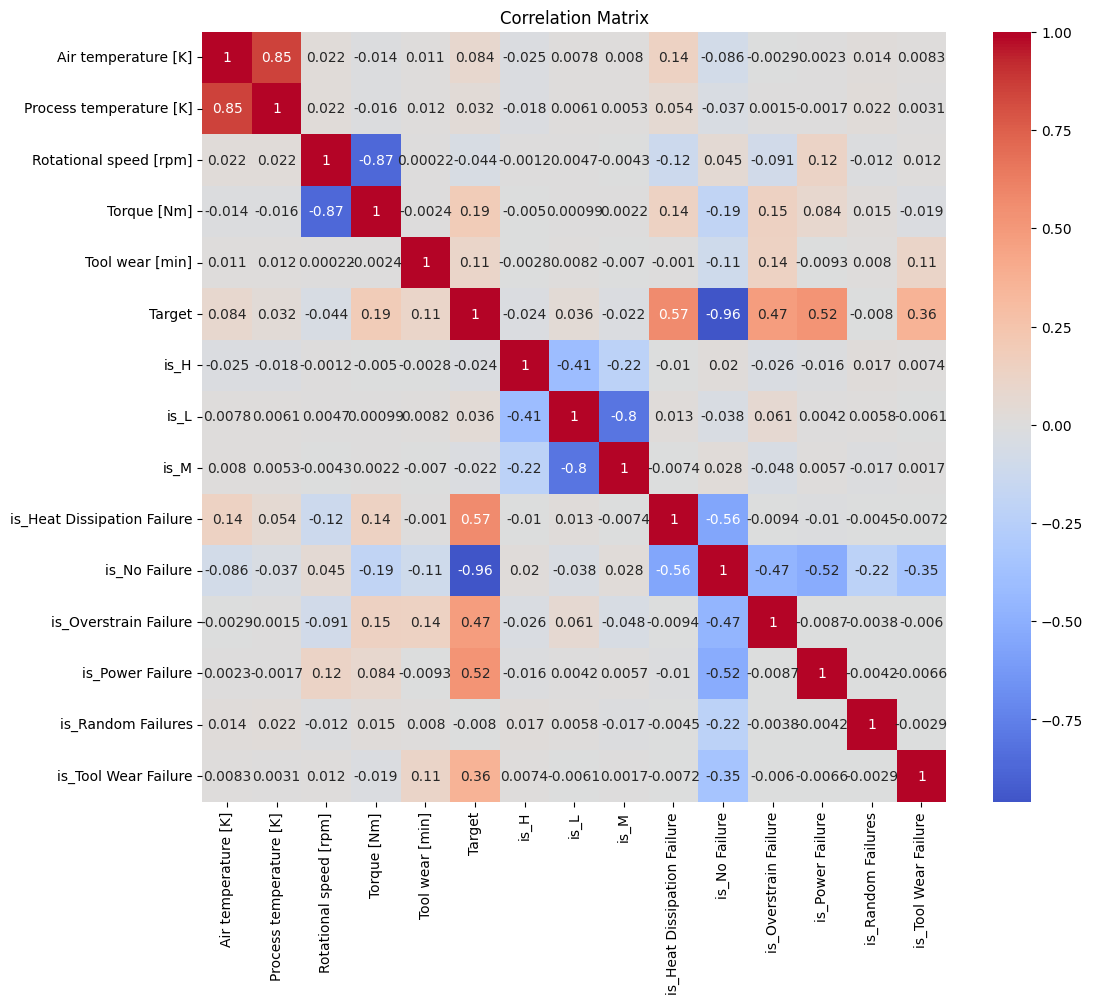

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi oluştur
corr_matrix = df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 'is_Random Failures' sütununu çıkar
df = df.drop(columns=['is_Random Failures'])

# Güncellenmiş datasetin ilk 5 satırını kontrol et
print(df.head(5))


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  298                      308                    1551   
1                  298                      308                    1408   
2                  298                      308                    1498   
3                  298                      308                    1433   
4                  298                      308                    1408   

   Torque [Nm]  Tool wear [min]  Target  is_H  is_L  is_M  \
0           42                0       0     0     0     1   
1           46                3       0     0     1     0   
2           49                5       0     0     1     0   
3           39                7       0     0     1     0   
4           40                9       0     0     1     0   

   is_Heat Dissipation Failure  is_No Failure  is_Overstrain Failure  \
0                            0              1                      0   
1                            0        

In [ ]:
# Null değerleri kontrol et
null_values = df.isnull().sum()
print(null_values)


Air temperature [K]            0
Process temperature [K]        0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Target                         0
is_H                           0
is_L                           0
is_M                           0
is_Heat Dissipation Failure    0
is_No Failure                  0
is_Overstrain Failure          0
is_Power Failure               0
is_Tool Wear Failure           0
dtype: int64


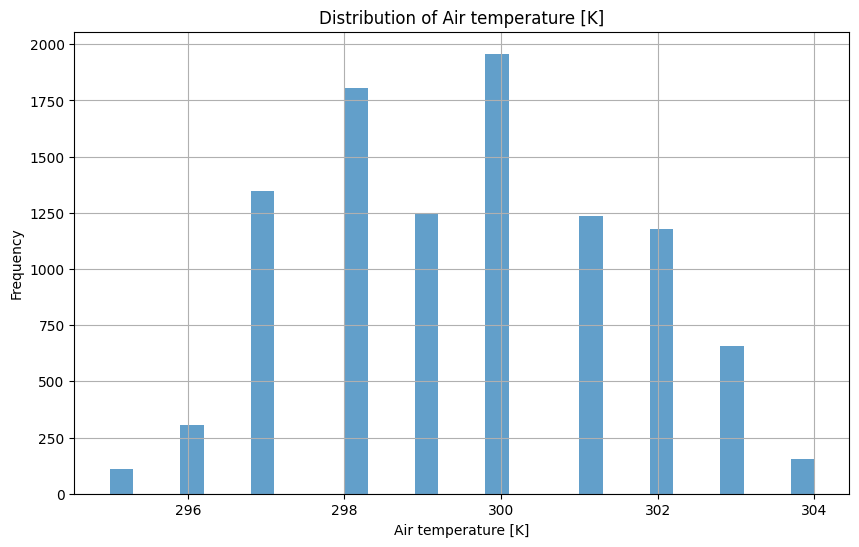

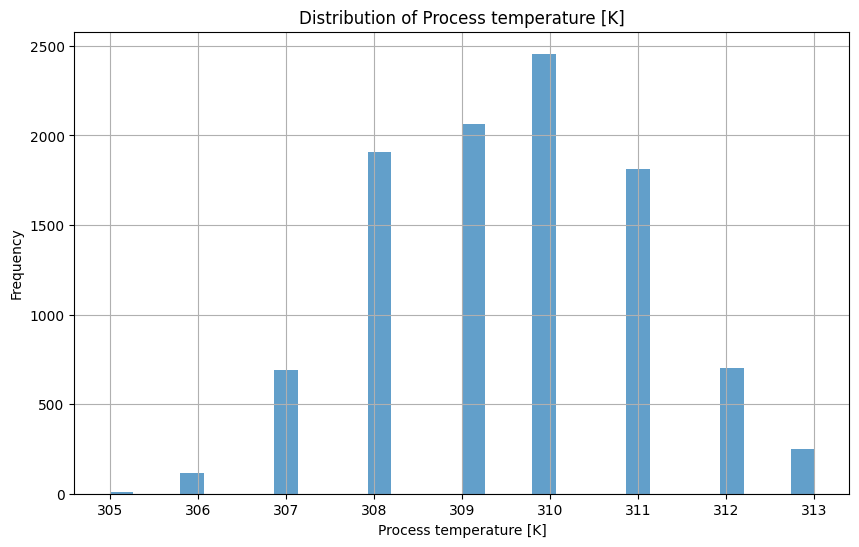

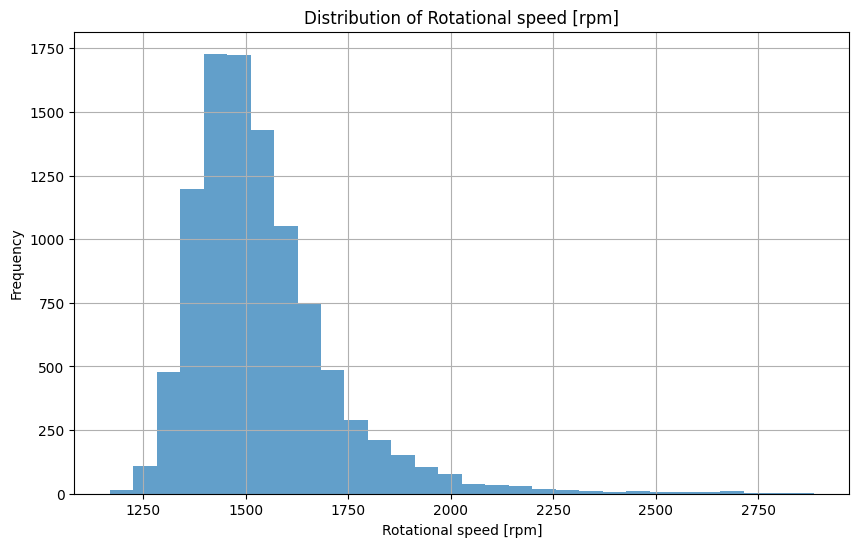

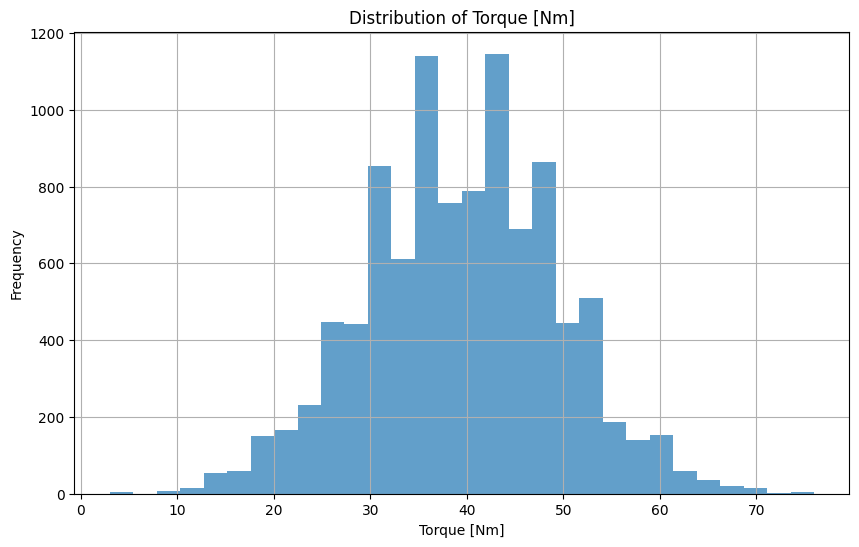

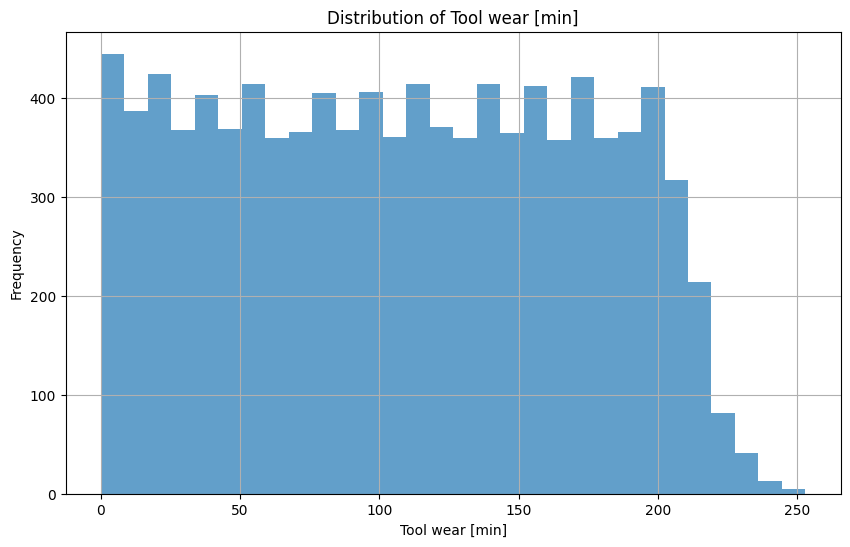

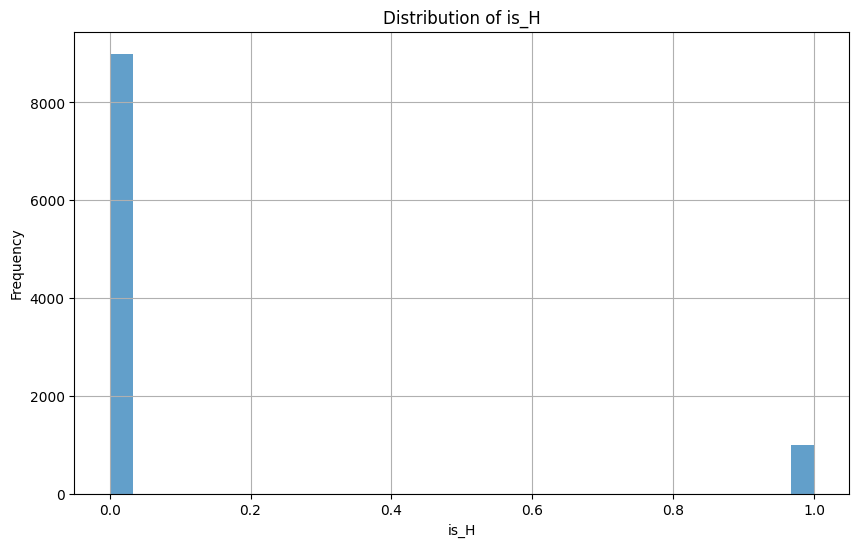

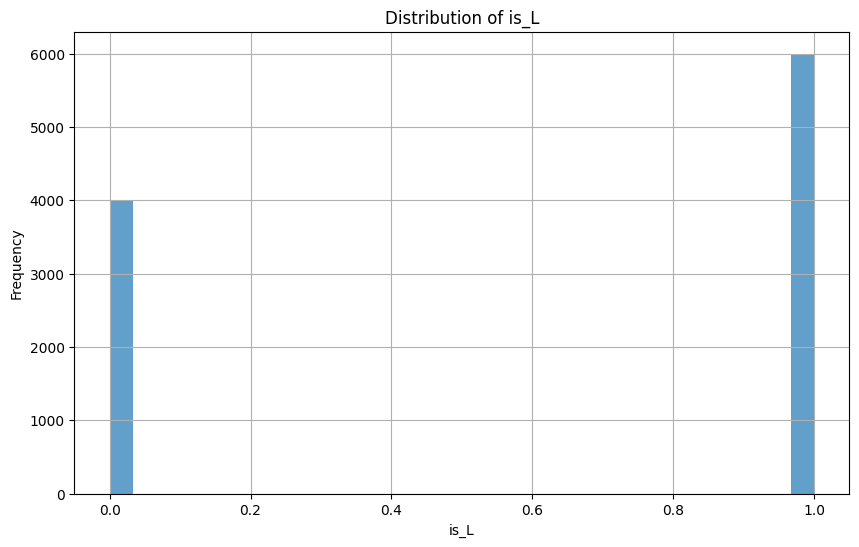

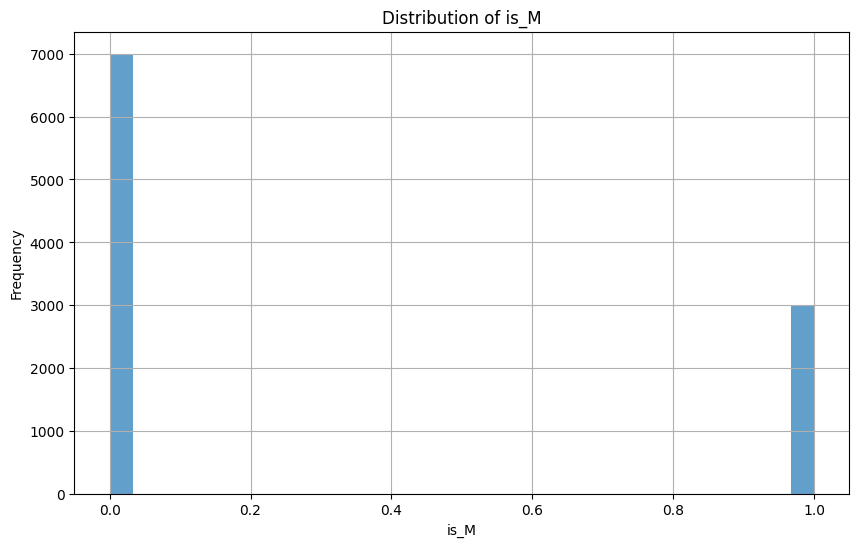

In [ ]:
import matplotlib.pyplot as plt

# Bağımlı değişkenlerin listesi
dependent_features = [col for col in df.columns if col not in independent_features]

# Her bir bağımlı değişken için histogram çiz
for feature in dependent_features:
    plt.figure(figsize=(10, 6))
    df[feature].hist(bins=30, alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


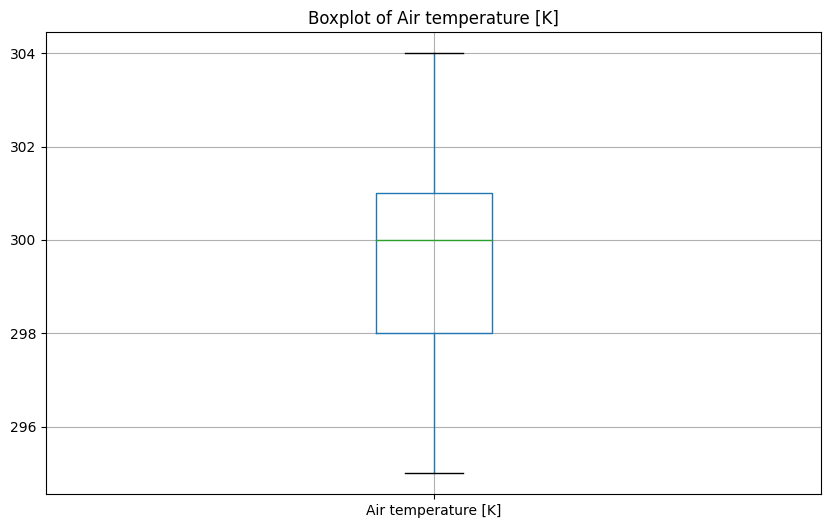

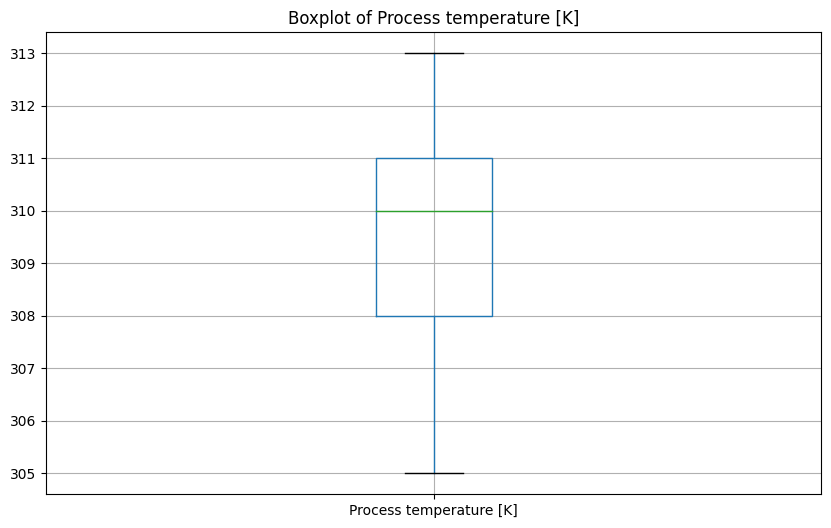

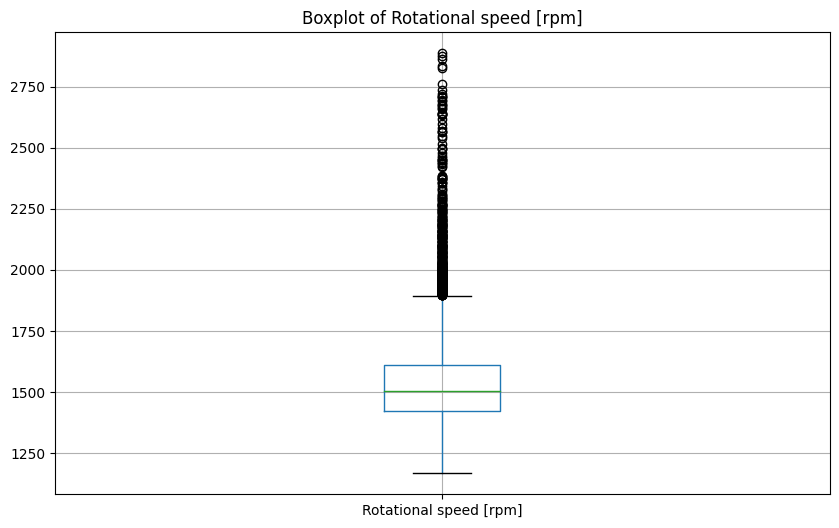

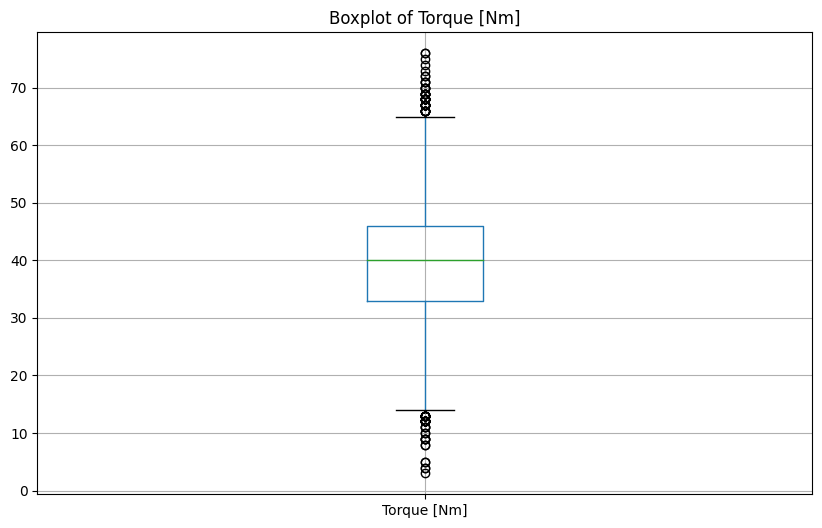

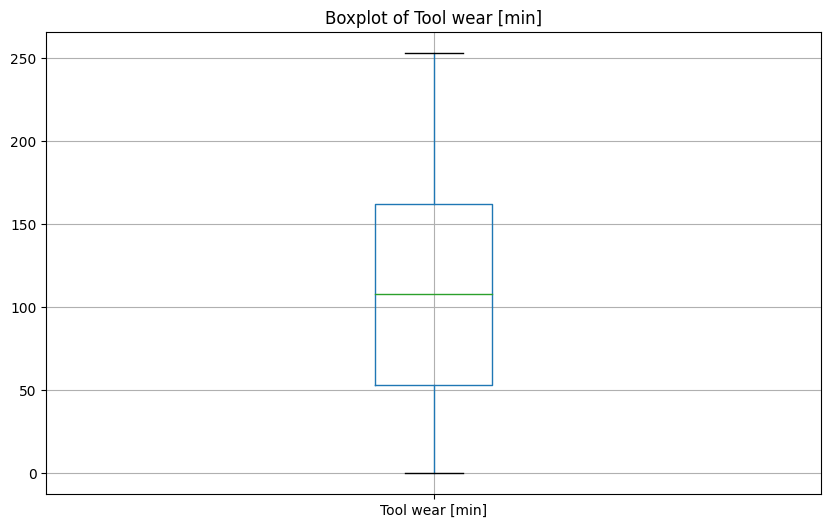

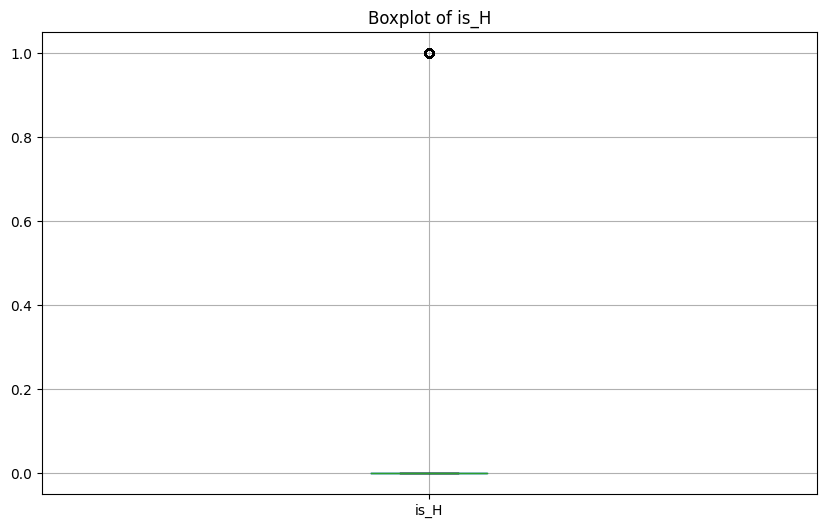

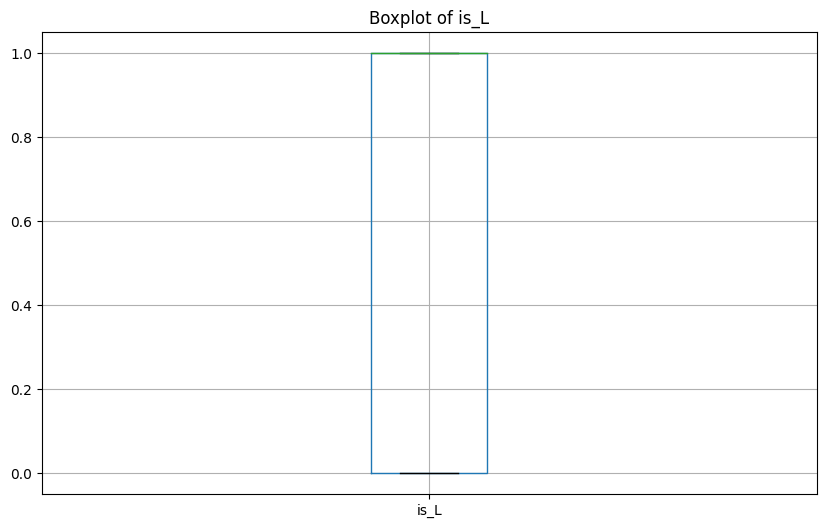

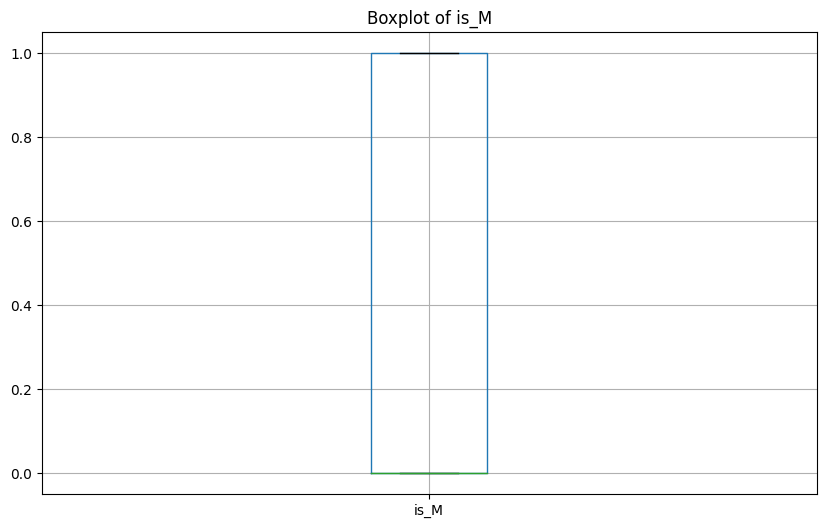

In [ ]:
# Her bir bağımlı değişken için boxplot çiz
for feature in dependent_features:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


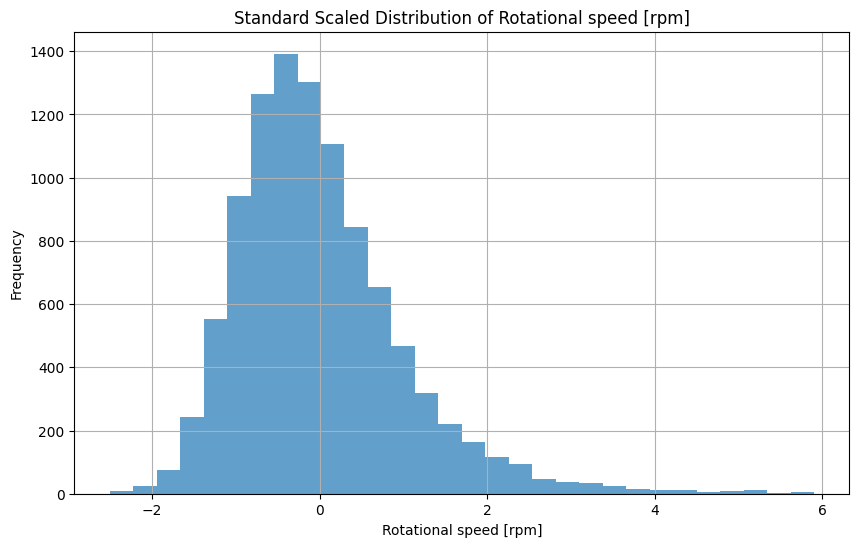

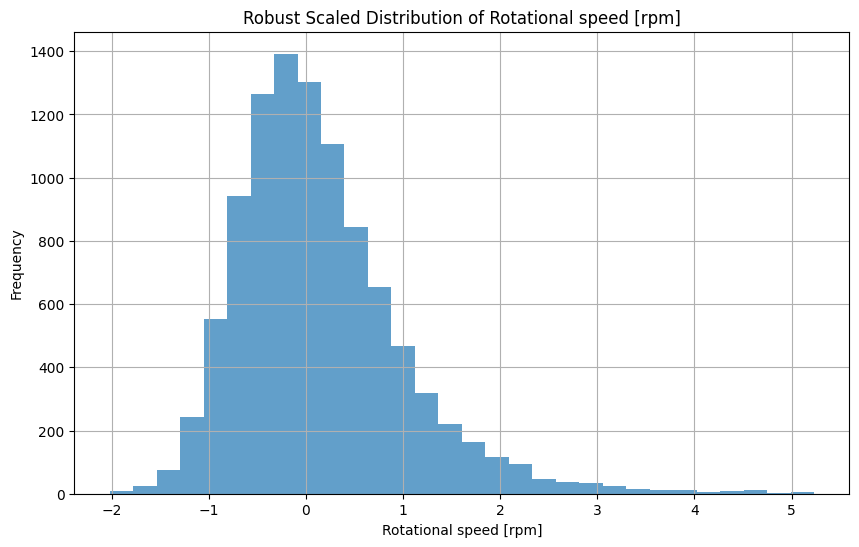

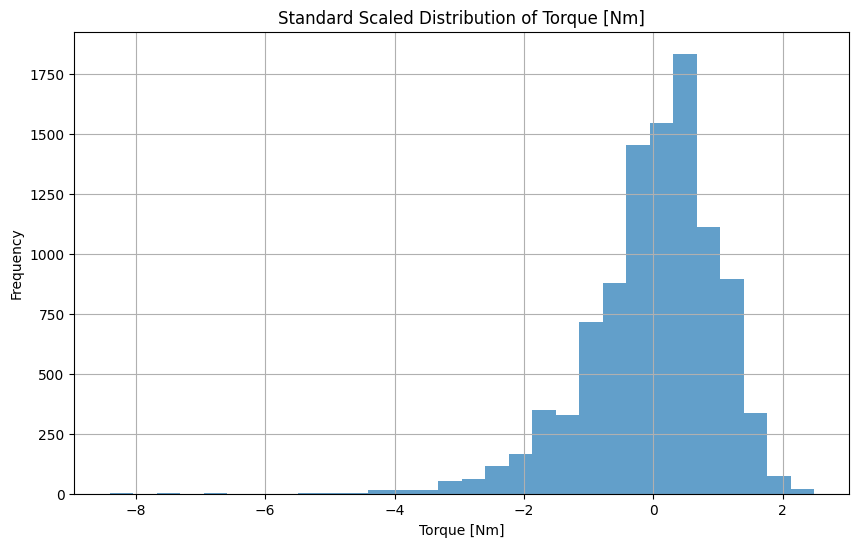

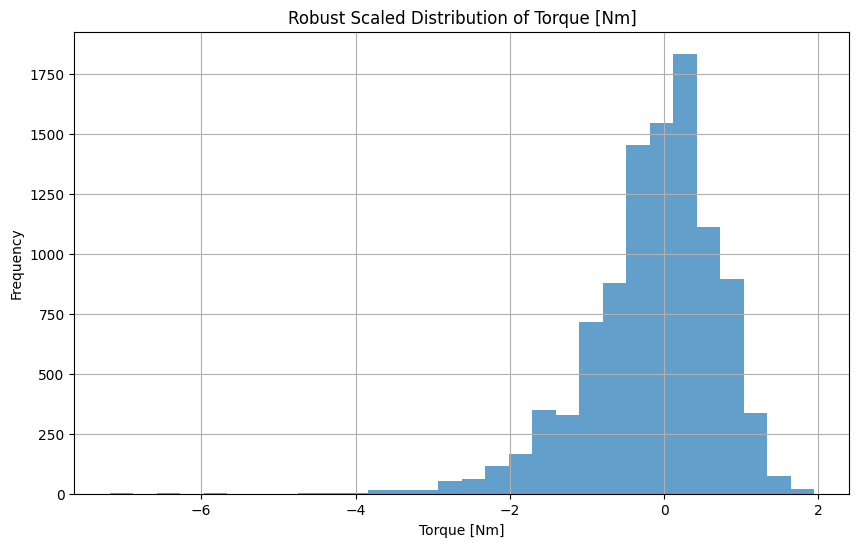

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Bağımlı değişkenlerin listesi
dependent_features = ['Rotational speed [rpm]', 'Torque [Nm]']

# StandardScaler ve RobustScaler'ı tanımla
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

# StandardScaler'ı uygulama
df_standard_scaled = df.copy()
df_standard_scaled[dependent_features] = scaler_standard.fit_transform(df[dependent_features])

# RobustScaler'ı uygulama
df_robust_scaled = df.copy()
df_robust_scaled[dependent_features] = scaler_robust.fit_transform(df[dependent_features])

# Ölçeklendirilmiş verilerin dağılımlarını görselleştirme
for feature in dependent_features:
    plt.figure(figsize=(10, 6))
    df_standard_scaled[feature].hist(bins=30, alpha=0.7)
    plt.title(f'Standard Scaled Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    df_robust_scaled[feature].hist(bins=30, alpha=0.7)
    plt.title(f'Robust Scaled Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


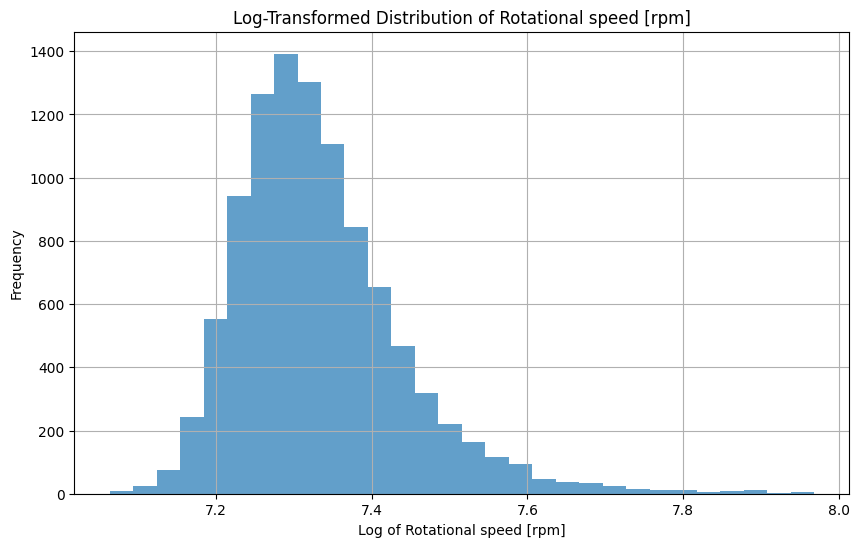

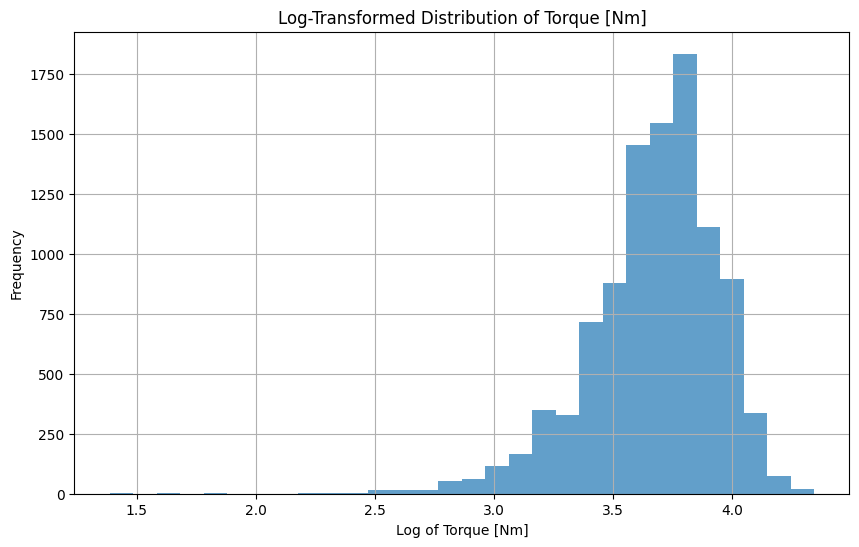

In [ ]:
# Rotational speed ve Torque için histogram çizme
plt.figure(figsize=(10, 6))
df['Rotational speed [rpm]'].hist(bins=30, alpha=0.7)
plt.title('Log-Transformed Distribution of Rotational speed [rpm]')
plt.xlabel('Log of Rotational speed [rpm]')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
df['Torque [Nm]'].hist(bins=30, alpha=0.7)
plt.title('Log-Transformed Distribution of Torque [Nm]')
plt.xlabel('Log of Torque [Nm]')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Binary classification için verileri hazırlama
X = df.drop(columns=['Target'])
y = df['Target']

# Verileri eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes modelini oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yap
y_pred = nb_model.predict(X_test)

# Modelin performansını değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


ValueError: could not convert string to float: 'No Failure'

In [ ]:
# Arıza türlerini belirlemek için yeni bir sütun ekleyelim
df['Failure Type'] = df.apply(
    lambda row: 'No Failure' if row['is_No Failure'] == 1 else
                'Heat Dissipation Failure' if row['is_Heat Dissipation Failure'] == 1 else
                'Overstrain Failure' if row['is_Overstrain Failure'] == 1 else
                'Power Failure' if row['is_Power Failure'] == 1 else
                'Tool Wear Failure', axis=1
)

# Multiclass classification için verileri hazırlama
failure_data = df[df['Target'] == 1]
X_failure = failure_data.drop(columns=['Target', 'Failure Type'])
y_failure = failure_data['Failure Type']

# Verileri eğitim ve test setlerine ayır
X_train_failure, X_test_failure, y_train_failure, y_test_failure = train_test_split(X_failure, y_failure, test_size=0.2, random_state=42)

# Naive Bayes modelini oluştur ve eğit
nb_model_failure = GaussianNB()
nb_model_failure.fit(X_train_failure, y_train_failure)

# Test verileri üzerinde tahmin yap
y_pred_failure = nb_model_failure.predict(X_test_failure)

# Modelin performansını değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test_failure, y_pred_failure))
print("\nClassification Report:")
print(classification_report(y_test_failure, y_pred_failure))
print("\nAccuracy Score:")
print(accuracy_score(y_test_failure, y_pred_failure))


Confusion Matrix:
[[21  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 15]]

Classification Report:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        21
              No Failure       1.00      1.00      1.00         3
      Overstrain Failure       1.00      1.00      1.00        17
           Power Failure       1.00      1.00      1.00        12
       Tool Wear Failure       1.00      1.00      1.00        15

                accuracy                           1.00        68
               macro avg       1.00      1.00      1.00        68
            weighted avg       1.00      1.00      1.00        68


Accuracy Score:
1.0


In [ ]:
# is_ ile başlayan sütunları sayısal veri tipine dönüştürme
failure_columns = [
    'is_Heat Dissipation Failure',
    'is_No Failure',
    'is_Overstrain Failure',
    'is_Power Failure',
    'is_Tool Wear Failure'
]

for col in failure_columns:
    df[col] = df[col].astype(int)

# Güncellenmiş dataframe'in ilk 5 satırını kontrol et
print(df.head())


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  298                      308                7.347300   
1                  298                      308                7.250636   
2                  298                      308                7.312553   
3                  298                      308                7.268223   
4                  298                      308                7.250636   

   Torque [Nm]  Tool wear [min]  Target  is_H  is_L  is_M  \
0     3.761200                0       0     0     0     1   
1     3.850148                3       0     0     1     0   
2     3.912023                5       0     0     1     0   
3     3.688879                7       0     0     1     0   
4     3.713572                9       0     0     1     0   

   is_Heat Dissipation Failure  is_No Failure  is_Overstrain Failure  \
0                            0              1                      0   
1                            0        

In [ ]:
df = df.drop(columns=['Failure Type'])


In [ ]:
df.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,is_H,is_L,is_M,is_Heat Dissipation Failure,is_No Failure,is_Overstrain Failure,is_Power Failure,is_Tool Wear Failure
0,298,308,7.347300,3.761200,0,0,0,0,1,0,1,0,0,0
1,298,308,7.250636,3.850148,3,0,0,1,0,0,1,0,0,0
2,298,308,7.312553,3.912023,5,0,0,1,0,0,1,0,0,0
3,298,308,7.268223,3.688879,7,0,0,1,0,0,1,0,0,0
4,298,308,7.250636,3.713572,9,0,0,1,0,0,1,0,0,0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Binary classification için verileri hazırlama
X = df.drop(columns=['Target'])
y = df['Target']

# Verileri eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes modelini oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yap
y_pred = nb_model.predict(X_test)

# Modelin performansını değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1933    6]
 [   2   59]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.91      0.97      0.94        61

    accuracy                           1.00      2000
   macro avg       0.95      0.98      0.97      2000
weighted avg       1.00      1.00      1.00      2000


Accuracy Score:
0.996


In [ ]:
from sklearn.model_selection import cross_val_score

# Naive Bayes modelini tanımla
nb_model = GaussianNB()

# K-fold cross-validation ile modelin performansını değerlendir
cv_scores = cross_val_score(nb_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {cv_scores.mean()}')


Cross-Validation Accuracy Scores: [1.    0.996 0.997 0.997 1.    0.994 0.996 0.995 1.    0.998]
Average Cross-Validation Accuracy: 0.9973000000000001
